In [1]:
import ROOT
from ROOT import TFile
from ROOT import RooDataSet, RooDataHist, RooArgSet, RooArgList, RooRealVar, RooFormulaVar, RooWorkspace
from ROOT import RooBDecay, RooTruthModel, RooFFTConvPdf, RooHistPdf, RooDecay
from ROOT import gPad , TCanvas , TPaveText , TLegend

In [2]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import zfit

/opt/anaconda3/envs/root-env/lib/python3.12/site-packages/zfit/__init__.py:60: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(


In [3]:
prompt_up = ROOT.TFile.Open("root://eoslhcb.cern.ch//eos/lhcb/grid/prod/lhcb/anaprod/lhcb/LHCb/Collision24/DATA24.ROOT/00237608/0000/00237608_00000001_1.data24.root")
# data24_prompt_withut_magup
prompt_down = ROOT.TFile.Open("root://eoslhcb.cern.ch//eos/lhcb/grid/prod/lhcb/anaprod/lhcb/LHCb/Collision24/DATA24.ROOT/00237612/0000/00237612_00000001_1.data24.root")
# data24_prompt_withut_magdown

mcprompt_up = ROOT.TFile.Open("root://eoslhcb.cern.ch//eos/lhcb/grid/prod/lhcb/anaprod/lhcb/MC/2024/MC.ROOT/00237601/0000/00237601_00000001_1.mc.root")
# mc24_magup_prompt_bstojpsiphi_13144011_hlt1,2,
mcprompt_down = ROOT.TFile.Open("root://eoslhcb.cern.ch//eos/lhcb/grid/prod/lhcb/anaprod/lhcb/MC/2024/MC.ROOT/00237610/0000/00237610_00000001_1.mc.root")
# mc24_magdown_prompt_bstojpsiphi_13144011_hlt1,2,

mcdata_up = ROOT.TFile.Open("root://eoslhcb.cern.ch//eos/lhcb/grid/prod/lhcb/anaprod/lhcb/MC/2024/MC.ROOT/00237559/0000/00237559_00000001_1.mc.root")
# mc24_magup_bstojpsiphi_13144011_hlt1,2,
mcdata_down = ROOT.TFile.Open("root://eoslhcb.cern.ch//eos/lhcb/grid/prod/lhcb/anaprod/lhcb/MC/2024/MC.ROOT/00237560/0000/00237560_00000001_1.mc.root")
# mc24_magdown_bstojpsiphi_13144011_hlt1,2,

In [4]:
mcprompt_down.ls()

TNetXNGFile**		root://eoslhcb.cern.ch//eos/lhcb/grid/prod/lhcb/anaprod/lhcb/MC/2024/MC.ROOT/00237610/0000/00237610_00000001_1.mc.root	
 TNetXNGFile*		root://eoslhcb.cern.ch//eos/lhcb/grid/prod/lhcb/anaprod/lhcb/MC/2024/MC.ROOT/00237610/0000/00237610_00000001_1.mc.root	
  KEY: TDirectoryFile	BsToJpsiPhi_MC;1	BsToJpsiPhi_MC
  KEY: TDirectoryFile	BsToJpsiPhi;1	BsToJpsiPhi


In [5]:
combined_prompt = ROOT.TChain("BsToJpsiPhi/DecayTree")  
combined_prompt.Add("./Data/data24_prompt_withut_magup_1_1.root")
combined_prompt.Add("./Data/data24_prompt_withut_magdown_1_1.root")

combined_mcprompt = ROOT.TChain("BsToJpsiPhi/DecayTree")  
combined_mcprompt.Add("root://eoslhcb.cern.ch//eos/lhcb/grid/prod/lhcb/anaprod/lhcb/MC/2024/MC.ROOT/00237601/0000/00237601_00000001_1.mc.root")
combined_mcprompt.Add("root://eoslhcb.cern.ch//eos/lhcb/grid/prod/lhcb/anaprod/lhcb/MC/2024/MC.ROOT/00237610/0000/00237610_00000001_1.mc.root")

combined_mcdata = ROOT.TChain("BsToJpsiPhi_Detached/DecayTree")  
combined_mcdata.Add("root://eoslhcb.cern.ch//eos/lhcb/grid/prod/lhcb/anaprod/lhcb/MC/2024/MC.ROOT/00237559/0000/00237559_00000001_1.mc.root")
combined_mcdata.Add("root://eoslhcb.cern.ch//eos/lhcb/grid/prod/lhcb/anaprod/lhcb/MC/2024/MC.ROOT/00237560/0000/00237560_00000001_1.mc.root")

1

In [6]:
branch_list = combined_prompt.GetListOfBranches()

for branch in branch_list:
    print(branch.GetName())

NPVs
ALLPVX
ALLPVY
ALLPVZ
BUNCHCROSSING_ID
BUNCHCROSSING_TYPE
EVENTNUMBER
GPSTIME
Hlt1D2KKDecision
Hlt1D2KPiDecision
Hlt1D2PiPiDecision
Hlt1DiMuonHighMassDecision
Hlt1DiMuonLowMassDecision
Hlt1DiMuonNoIPDecision
Hlt1DiMuonNoIP_ssDecision
Hlt1DiMuonSoftDecision
Hlt1DisplacedDiMuonDecision
Hlt1DisplacedLeptonsDecision
Hlt1GECPassthroughDecision
Hlt1KsToPiPiDecision
Hlt1LowPtDiMuonDecision
Hlt1LowPtMuonDecision
Hlt1OneMuonDecision
Hlt1OneMuonTrackLineDecision
Hlt1PassthroughDecision
Hlt1SingleHighEtDecision
Hlt1SingleHighPtMuonDecision
Hlt1TrackMVADecision
Hlt1TrackMuonMVADecision
Hlt1TwoTrackKsDecision
Hlt1TwoTrackMVACharmXSecDecision
Hlt1TwoTrackMVADecision
Hlt1_TCK
Hlt2B2CC_BdToJpsiKstar_JpsiToMuMu_DetachedDecision
Hlt2B2CC_BsToJpsiPhiDecision
Hlt2B2CC_BsToJpsiPhi_DetachedDecision
Hlt2B2CC_BsToJpsiPhi_ExtraMuonDecision
Hlt2B2CC_BsToJpsiPhi_JpsiToEE_DetachedDecision
Hlt2B2CC_BuToJpsiKplus_JpsiToMuMu_DetachedDecision
Hlt2B2OC_BdToDsmPi_DsmToKpKmPimDecision
Hlt2_TCK
NLongTracks
NPV
ODINTC

# Why we do that?

The decay lifetime error represents the time resolution or uncertainty in the measurement. If you ignore the size of the error, you might mix data with high uncertainty and low uncertainty, which can affect the overall accuracy of your analysis. By dividing the error into different intervals, you can better understand how the measurements behave at different levels of uncertainty, making it a form of calibration.

Dividing the entire dataset into multiple subsets (10 parts) based on the size of the error is a statistical method called stratification. The main purpose of this approach is to mitigate the impact of measurement uncertainty on the overall distribution. Each interval contains the same number of events, ensuring that each group of data carries relatively similar statistical weight.

Equal division of data: Dividing the data into subsets with an equal number of events means that each subset represents the same statistical weight.

When you fit a Gaussian distribution to each subset and plot the sigma values, a linear relationship emerges. This indicates that the error variation across different CTAUERR intervals is uniform, following an expected linear behavior. This linear trend can further help in understanding the relationship between detector resolution and the physical signal being measured.


Decay lifetime error 代表着测量的时间分辨率或不确定性。如果不考虑误差的大小，你可能会将高不确定性与低不确定性数据混合在一起，从而影响整体的分析准确性。通过将误差分成不同的区间，你可以更好地了解在不同的不确定性水平下的测量情况。因此是一种calibration。

将整个数据集按照误差大小分成多个子集（10份），是一种基于分组的统计分析方法。这样做的主要目的是消除测量不确定性对整体分布的影响。每个区间的事件数相同，使得每一组的数据在统计上具有相对相似的权重。

等分数据：将数据等分为相同数量的事件，意味着每个子集都代表了相同的统计权重。

当你对每个子集进行高斯拟合并绘制 sigma 值时，发现了一个线性的关系。这意味着误差在不同的 CTAUERR 区间内的变化是均匀的，符合一个预期的线性行为。这种线性关系可以用于进一步理解探测器分辨率和物理信号之间的相互作用。

# Function

In [7]:
def data_extraction_root_to_pd (data_paths,braches,tree_path):
    """
    example: 
    prompt_paths = [
    "root://eoslhcb.cern.ch//eos/lhcb/grid/prod/lhcb/anaprod/lhcb/LHCb/Collision24/DATA24.ROOT/00237608/0000/00237608_00000001_1.data24.root",
    "root://eoslhcb.cern.ch//eos/lhcb/grid/prod/lhcb/anaprod/lhcb/LHCb/Collision24/DATA24.ROOT/00237612/0000/00237612_00000001_1.data24.root"
    ]
    
    braches=["Bs_DTF_PV_CTAU", "Bs_DTF_PV_CTAUERR","RUNNUMBER"]
    
    tree_path = "BsToJpsiPhi/DecayTree"
    """
    all_data = []

    for path in data_paths:
        with uproot.open(path) as file:
            tree = file[tree_path] 
    
            branches = tree.arrays(
                braches,
                library="pd"
            )
    
            all_data.append(branches)

    combined_df = pd.concat(all_data, ignore_index=True)
    return combined_df

In [8]:
def quantiles_cutting_cal(selected_condition_quantity, filtered_quantity, quantiles, combined_df,cut_on_condata,
                          cut_on_quantity,unit=None,fitting_plots=False, cutting_binplot=False
                          ):
    """
    First limit the data (x-axis) according to cut_neg_x,cut_pos_x, then “cut”/select according to the established quantile.
    Fitting each cut plot


    Returns:
    dict:  fitting_results
    """
    
    fitting_results = {
        "quantile_range": [],
        "mean": [],
        "mean_error": [],
        "sigma": [],
        "sigma_error": [],
        "sigma_width_bar": [],
        "mid_bin_point": []
    }
######################### Fitting ######################### 
    for i in range(len(quantiles) - 1):
        # Data processing
        cut_df = combined_df[
            (combined_df[selected_condition_quantity] > quantiles[i]) & 
            (combined_df[selected_condition_quantity] < quantiles[i + 1])
        ]
        Ctau_data = cut_df[filtered_quantity]
        Ctau_data_filtered = Ctau_data[(Ctau_data >= cut_on_quantity[0]) & (Ctau_data <= cut_on_quantity[1])]

        # to zfit
        obs = zfit.Space(filtered_quantity, limits=(cut_on_quantity[0], cut_on_quantity[1]))
        Ctau_data_zfit = zfit.Data.from_numpy(obs=obs, array=Ctau_data_filtered.values)

        # Gauss
        mean = zfit.Parameter(f"mean_{i}", cut_on_quantity[1]/2, cut_on_quantity[0], cut_on_quantity[1])
        sigma = zfit.Parameter(f"sigma_{i}", cut_on_quantity[1]/2, 0, cut_on_quantity[1])
        amplitude = zfit.Parameter(f"amplitude_{i}", 1, 0, 10)
        gauss = zfit.pdf.Gauss(obs=obs, mu=mean, sigma=sigma)

        # Loss function and minimizer
        nll = zfit.loss.UnbinnedNLL(model=gauss, data=Ctau_data_zfit)
        minimizer = zfit.minimize.Minuit()

        # Fitting
        result = minimizer.minimize(nll)
        errors = result.hesse()
        
######################### Fitting parameters ######################### 
        # Save fitting parameters
        if result.converged:
            # Extract fitted parameter values
            sigma_val = sigma.value().numpy()
            mean_val = mean.value().numpy()

            # Extract error bars using the Hesse method
            errors = result.hesse()
            mean_error = errors[mean]['error']
            sigma_error = errors[sigma]['error']

            # Append results to the dictionary
            fitting_results["quantile_range"].append((quantiles[i], quantiles[i + 1]))
            fitting_results["mean"].append(mean_val)
            fitting_results["mean_error"].append(mean_error)
            fitting_results["sigma"].append(sigma_val)
            fitting_results["sigma_error"].append(sigma_error)
            fitting_results["sigma_width_bar"].append((quantiles[i+1] - quantiles[i]) / 2)
            fitting_results["mid_bin_point"].append(quantiles[i] + (quantiles[i+1] - quantiles[i]) / 2)
        else:
            # Append None values for failed fits
            fitting_results["quantile_range"].append((quantiles[i], quantiles[i + 1]))
            fitting_results["mean"].append(None)
            fitting_results["mean_error"].append(None)
            fitting_results["sigma"].append(None)
            fitting_results["sigma_error"].append(None)
            fitting_results["sigma_width_bar"].append(None)
            fitting_results["mid_bin_point"].append(None)

#######################################################################
        # Plot
        x_plot = np.linspace(cut_on_quantity[0], cut_on_quantity[1], 1000)
        y_plot = zfit.run(gauss.pdf(x_plot, norm_range=obs))
        
        if fitting_plots is not False:
            plt.figure(figsize=(10, 6))
            plt.hist(Ctau_data_filtered, bins=300, range=(cut_on_quantity[0]*1.3, cut_on_quantity[1]*1.3), density=True, color='blue', alpha=0.3, label='Data')
            plt.plot(x_plot, y_plot, color='red', lw=2, label=f'Fit for quantile {quantiles[i]:.5f}-{quantiles[i + 1]:.5f}')
            plt.title(f"{filtered_quantity} for quantile {quantiles[i]:.5f}-{quantiles[i + 1]:.5f}")
            plt.xlabel(filtered_quantity)
            plt.ylabel("Count")
            plt.legend()
            plt.grid(True)
            plt.show()
######################### colourfull histogram ######################### 
    data = combined_df[selected_condition_quantity].values
    binned_data = []

    # go through all quantile，and extract wanted range of filtered_quantity
    for i in range(len(quantiles) - 1):
        cut_df = combined_df[(combined_df[selected_condition_quantity] > quantiles[i]) & (combined_df[selected_condition_quantity] <= quantiles[i + 1])]
        Ctau_data = cut_df[selected_condition_quantity].values
        binned_data.append(Ctau_data)
#        print(f"Bin {i+1} ({quantiles[i]:.5f} to {quantiles[i+1]:.5f}) contains {len(Ctau_data)} data points.")

    plt.figure(figsize=(10, 6))

    if cutting_binplot is not False:
        for i in range(len(binned_data)):
            plt.hist(binned_data[i], bins=1000, alpha=0.5, range=(cut_on_condata[0]*0.8, cut_on_condata[1]*1.2), label=f'Quantile {i+1}: {quantiles[i]:.5f} - {quantiles[i+1]:.5f}')

        if unit is not None:
            plt.xlabel(f"{selected_condition_quantity}, {'('}{unit}{')'}")
        else:
            plt.xlabel(selected_condition_quantity)
        plt.ylabel('Counts')
        plt.legend()
        plt.show()   
     

    return fitting_results

In [9]:
def sig_vs_sig_t(selected_condition_quantity, filtered_quantity, combined_df, quantiles, fitting_results,xyplot=False,
                x_unit=None, y_unit=None):
    binned_data = []
    sigmas = fitting_results["sigma"]
    mid_bin_point = fitting_results["mid_bin_point"]
    sigma_width_bar = fitting_results['sigma_width_bar']
    sigma_error =   fitting_results["sigma_error" ]
 
    # go through quantile and extract Bs_DTF_PV_CTAU
    for i in range(len(quantiles) - 1):
        cut_df = combined_df[(combined_df[selected_condition_quantity] > quantiles[i]) & (combined_df[selected_condition_quantity] <= quantiles[i + 1])]
        Ctau_data = cut_df[filtered_quantity].values
        binned_data.append(Ctau_data)
    
    # Normalization
    total_data_points = sum([len(b) for b in binned_data])

    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # plot sigma on left y-axis
    ax1.errorbar(mid_bin_point,sigmas,  xerr=sigma_width_bar,yerr=sigma_error, fmt='o', color='blue')
    if x_unit is not None:
        plt.xlabel(f"{selected_condition_quantity}, {'('}{x_unit}{')'}")
    else:
        plt.xlabel(selected_condition_quantity)
        
    if y_unit is not None:
        plt.ylabel(f"{'Fitted Sigma'}, {'('}{y_unit}{')'}")
    else:
        plt.ylabel('Fitted Sigma', color='blue')
    
    fit_params = np.polyfit(mid_bin_point, sigmas, 1)  
    extended_x = np.linspace( quantiles[0]*0.98,  quantiles[-1]*1.05, 100)  
    fit_line = np.polyval(fit_params, extended_x)  
    extended_y= np.linspace(0 ,  quantiles[-1]*1.3, 100)

    #ax1.plot(mid_bin_point, fit_line, color='red', linestyle='-', label='Linear Fit')
    ax1.plot(extended_x, fit_line, color='k', linestyle='-')
    if xyplot is not False:
        ax1.plot(extended_y, extended_y, color='green', linestyle='-', label='y=x')  
    # second qunatity on right-axis
    ax2 = ax1.twinx()

    # normalization for background plot
    for i in range(len(binned_data)):
        bin_range = (quantiles[i+1] - quantiles[i])
        normalized_height = len(binned_data[i]) / (1.15*total_data_points * bin_range)  # 归一化高度
#        ax2.bar(quantiles[i], normalized_height, width=bin_range, alpha=0.3, align='edge', label=f' {i+1}: {quantiles[i]:.4f} - {quantiles[i+1]:.4f}')
        ax2.bar(quantiles[i], normalized_height, width=bin_range, alpha=0.3, align='edge')

    ax2.set_ylabel('Normalized Counts (Density)', color='gray')
#    ax2.set_ylim(0, 200)  
 #   ax1.set_xlim(0, 0.08)
 #   ax1.set_ylim(0, 0.08)
    fig.tight_layout()
#    plt.legend()
    plt.show()

    return fit_params 


In [10]:
def mean_vs_sig_t(selected_condition_quantity, filtered_quantity,quantiles,combined_df,fitting_results,x_unit=None,y_unit=None):
    binned_data = []
    
    mean = fitting_results["mean"]
    mid_bin_point = fitting_results["mid_bin_point"]
    mean_errors = fitting_results["mean_error" ]
    
    # go through quantile and extract Bs_DTF_PV_CTAU
    for i in range(len(quantiles) - 1):
        cut_df = combined_df[(combined_df[selected_condition_quantity] > quantiles[i]) & (combined_df[selected_condition_quantity] <= quantiles[i + 1])]
        Ctau_data = cut_df[filtered_quantity].values
        binned_data.append(Ctau_data)
    
    # 计算总数据点数以进行归一化
    total_data_points = sum([len(b) for b in binned_data])

    fig, ax1 = plt.subplots(figsize=(10, 6))

#    ax1.plot(mid_bin_point, mean,color='b',marker='o', linestyle='-', label='Mean')
    ax1.errorbar(mid_bin_point, mean,  yerr=mean_errors, fmt='o', color='blue', label='Mean')
    ax1.set_xlabel(selected_condition_quantity)
    if y_unit is not None:
        ax1.set_ylabel(f"{'Fitted Mean'}, {'('}{y_unit}{')'}")
    else:
        ax1.set_ylabel('Fitted Mean')
   # ax1.set_ylabel('mean', color='blue')


#    ax1.plot(extended_x, 1, color='green', linestyle='-', label='y=x')  

    
    # 创建第二个 y 轴用于绘制背景直方图 (counts)，显示在右侧
    ax2 = ax1.twinx()

    # 绘制背景直方图，并归一化
    for i in range(len(binned_data)):
        bin_range = (quantiles[i+1] - quantiles[i])
        normalized_height = len(binned_data[i]) / (total_data_points * bin_range)  # 归一化高度
        ax2.bar(quantiles[i], normalized_height, width=bin_range, alpha=0.3, align='edge')

    ax2.set_ylabel('Normalized Counts (Density)', color='gray')
    if x_unit is not None:
        plt.xlabel(selected_condition_quantity, {'('},{x_unit},{')'})
    else:
        plt.xlabel(selected_condition_quantity)

    fig.tight_layout()
    plt.legend()
    plt.show()


In [11]:
def runnumber_cutting_cal(filtered_quantity, combined_df, fitting_plots=False,simple_cal = False,y_unit=None):
    """
    First limit the data (x-axis) according to cut_neg_x,cut_pos_x, then “cut”/select according to the established quantile.
    Fitting each cut plot


    Returns:
    dict:  fitting_results
    """
    
    fitting_results = {
        "runnumbers": [],
        "mean": [],
        "mean_error": [],
        "sigma": [],
        "sigma_error": [], 
    }
    
    average_values = []
    rms_values = []
    runnumbers=[]
    
    grouped = combined_df.groupby("RUNNUMBER")
######################### CMS/MEAN ######################### 
    if simple_cal is not False:
        for runnumber, group in grouped:
            data = group[filtered_quantity].values  # 将数据转换为数组
            filtered_data = np.array(data[(data >= -0.025) & (data <= 0.025)])
            
            average_value = np.mean(filtered_data)*(10**3)/0.3
            rms_value = np.sqrt(np.mean(filtered_data ** 2))*(10**3)/0.3
            
            average_values.append(average_value)
            rms_values.append(rms_value)
            runnumbers.append(runnumber)
        
        plt.figure(figsize=(10, 6))
        plt.plot(runnumbers, average_values, color='k', linestyle='-', label='Mean')
        plt.plot(runnumbers, rms_values, color='b', linestyle='-', label='RMS')
        plt.xlabel("RUNNUMBER")
        plt.ylabel("Mean and CMS (fs)")
        plt.title("Mean/CMS vs RUNNUMBER")
        plt.grid(True)
        plt.legend()
        plt.show()

        return average_values, rms_values
######################### Fitting ######################### 
    for runnumber, group in grouped:
        # 定义观测数据空间
        fitting_results['runnumbers'].append(runnumber)
        data = group[filtered_quantity].values  # 将数据转换为数组
        filtered_data = data[(data >= -0.025) & (data <= 0.025)]
        obs = zfit.Space(filtered_quantity, limits=(-0.025, 0.025))
    
        # 定义 zfit 的数据对象
        data_zfit = zfit.Data.from_numpy(obs=obs, array=filtered_data )
        
        # Gaussian model
        mean = zfit.Parameter("mean", 0., -0.01, 0.1)  # 平均值
        sigma = zfit.Parameter("sigma", 0.001, 0., 0.1)  # 标准差
        gaussian = zfit.pdf.Gauss(mu=mean, sigma=sigma, obs=obs)
    
        # loss function
        nll = zfit.loss.UnbinnedNLL(model=gaussian, data=data_zfit)
    
        # 创建优化器并进行拟合
        minimizer = zfit.minimize.Minuit()
        result = minimizer.minimize(nll)    
        errors = result.hesse()
        
        # 创建用于绘制拟合曲线的 x 数据
        x_plot = np.linspace(-0.02, 0.02, 1000)
        y_plot = gaussian.pdf(x_plot, norm_range=obs)

        if result.converged:
           # Extract fitted parameter values
            sigma_val = sigma.value().numpy()
            mean_val = mean.value().numpy()

            # Extract error bars using the Hesse method
            errors = result.hesse()
            mean_error = errors[mean]['error']
            sigma_error = errors[sigma]['error']
            
            # Append results to the dictionary
            fitting_results["mean"].append(mean_val)
            fitting_results["mean_error"].append(mean_error)
            fitting_results["sigma"].append(sigma_val)
            fitting_results["sigma_error"].append(sigma_error)
        else:
            # Append None values for failed fits
            fitting_results["mean"].append(None)
            fitting_results["mean_error"].append(None)
            fitting_results["sigma"].append(None)
            fitting_results["sigma_error"].append(None)

        if fitting_plots is not False:
            plt.figure(figsize=(10, 6))
            plt.hist(group[filtered_quantity], bins=50, range=(-0.025, 0.025), density=True, color='blue', alpha=0.3, label='Data')
            plt.plot(x_plot, y_plot, color='red', lw=2, label=f'Fit: μ = {mean_val:.5f}, σ = {sigma_val:.5f}')
            plt.xlim(-0.05,0.05)
            plt.grid(True)
            plt.title(f"RUNNUMBER: {runnumber} - Gaussian Fit")
            plt.legend()
            plt.show()
            
    
    plt.figure(figsize=(10, 10))
    plt.errorbar(fitting_results['runnumbers'], fitting_results['mean'],yerr=fitting_results['mean_error'],fmt='o', alpha=0.3, color='blue',label='mean')
    plt.errorbar(fitting_results['runnumbers'], fitting_results['sigma'] ,yerr=fitting_results['sigma_error'],fmt='o', alpha=0.3, color='red',label='sigma')

    quan_num = [0.1, 0.25, 0.5, 0.75,1]
    mean_quantile = np.quantile(fitting_results['mean'], quan_num)
    
    ##### Ploting the Colourful BG distribution
    for i in range(len(mean_quantile)):
        plt.plot([np.min(fitting_results['runnumbers'])-100, np.max(fitting_results['runnumbers'])+100], 
             [mean_quantile[i], mean_quantile[i]], 
             color='k',alpha = (quan_num[i]+0.4)/(quan_num[-1]+0.4), linestyle='-', label=f'Quantile { quan_num[i]:.2f}: {mean_quantile[i]:.2f}')
    
    sigma_quantile = np.quantile(fitting_results['sigma'], quan_num)
    for i in range(len(sigma_quantile)):
        plt.plot([np.min(fitting_results['runnumbers'])-100, np.max(fitting_results['runnumbers'])+100], 
             [sigma_quantile[i], sigma_quantile[i]], 
             color='g',alpha = (quan_num[i]+0.4)/(quan_num[-1]+0.4), linestyle='-', label=f'Quantile {  quan_num[i]:.2f}: { sigma_quantile[i]:.2f}')
    
    plt.xlabel("RUNNUMBER")
    if y_unit is not None:
        plt.ylabel(f"{'Mean/Sigma'}, {'('}{y_unit}{')'}")
    else:
        plt.ylabel('Mean/Sigma')

    plt.title("Mean/sigma vs RUNNUMBER")
    plt.xlim(np.min(fitting_results['runnumbers'])-50,np.max(fitting_results['runnumbers'])+50)
    plt.grid(True)
    plt.legend()
    plt.show()

    return fitting_results

In [12]:
def gaussfit_without_BG (fitting_quantity, combined_df,cut_on_data,plot=False):
    # data Bs_BPVLTIME in [-0.0001, 0.0001]
    data_np = combined_df[fitting_quantity].values
    data_np = data_np[(data_np >= cut_on_data[0]) & (data_np <= cut_on_data[1])]  

    # define zfit space 
    obs = zfit.Space(fitting_quantity, limits=(cut_on_data[0], cut_on_data[1]))

    # load data zfit
    data = zfit.Data.from_numpy(obs=obs, array=data_np)

    # gaussian
    mean = zfit.Parameter("mean", 0.0, cut_on_data[0], cut_on_data[1])
    sigma = zfit.Parameter("sigma", 0.01, 0, abs(cut_on_data[1]))
    gauss = zfit.pdf.Gauss(mu=mean, sigma=sigma, obs=obs)

    # combined model
    model = gauss

    # fitting
    nll = zfit.loss.UnbinnedNLL(model=model, data=data)
    minimizer = zfit.minimize.Minuit()
    result = minimizer.minimize(nll)

    # plot
    x_plot = np.linspace(cut_on_data[0], cut_on_data[1], 1000)
    y_plot = zfit.run(model.pdf(x_plot, norm_range=obs))

    # plot
    if plot is not False:  
        plt.figure(figsize=(10, 6))
        plt.hist(data_np, bins=300, range=(cut_on_data[0], cut_on_data[1]), density=True, color='blue', alpha=0.3, label='Data')
        plt.plot(x_plot, y_plot, color='red', lw=2, label='Fit')
        plt.xlabel(fitting_quantity)
        plt.ylabel("Count")
        plt.legend()
        plt.grid(True)
        plt.show()

 
    result.hesse()  
    fitting_param = result.params
    
    return  fitting_param

# Prompt Data

### Ctau

In [13]:
prompt_paths = [
    "root://eoslhcb.cern.ch//eos/lhcb/grid/prod/lhcb/anaprod/lhcb/LHCb/Collision24/DATA24.ROOT/00237608/0000/00237608_00000001_1.data24.root",
    "root://eoslhcb.cern.ch//eos/lhcb/grid/prod/lhcb/anaprod/lhcb/LHCb/Collision24/DATA24.ROOT/00237612/0000/00237612_00000001_1.data24.root"
]
braches=["Bs_DTF_PV_CTAU", "Bs_DTF_PV_CTAUERR","RUNNUMBER","NPVs"]
tree_path = "BsToJpsiPhi/DecayTree"


combined_df_prompt = data_extraction_root_to_pd(prompt_paths,braches,tree_path)

In [14]:
combined_df_prompt['Bs_DTF_PV_TAUERR (ps)'] =combined_df_prompt['Bs_DTF_PV_CTAUERR']/0.3
combined_df_prompt['Bs_DTF_PV_TAU (ps)'] =combined_df_prompt['Bs_DTF_PV_CTAU']/0.3

In [15]:
combined_df_prompt

,Bs_DTF_PV_CTAU,Bs_DTF_PV_CTAUERR,RUNNUMBER,NPVs,Bs_DTF_PV_TAUERR (ps),Bs_DTF_PV_TAU (ps)
0,0.002657,0.006551,301189,5,0.021835,0.008856
1,0.030953,0.007928,301189,4,0.026426,0.103176
2,0.010263,0.008952,301189,8,0.029838,0.034210
3,0.015013,0.008482,301189,4,0.028273,0.050044
4,0.011542,0.008284,301189,4,0.027612,0.038473
...,...,...,...,...,...,...
168539,0.014279,0.010071,302315,4,0.033570,0.047598
168540,-0.475730,0.011883,302315,6,0.039610,-1.585766
168541,0.003379,0.009091,302315,3,0.030303,0.011264
168542,-0.014176,0.010124,302315,5,0.033748,-0.047253


In [16]:
num= np.concatenate([np.round(np.linspace(0,0.05,10),4),np.round(np.linspace(0.051,0.25,30),4),np.round(np.linspace(0.26,0.7,25),4),np.round(np.linspace(0.71,1,10),4)])

[0.01217726 0.01886776 0.02029942 0.02127127 0.02200514 0.02260922
 0.0231187  0.02359065 0.02400058 0.02436994 0.02443222 0.02486759
 0.02523817 0.02559648 0.02593056 0.0262331  0.02650778 0.02675654
 0.02702637 0.02727222 0.02750296 0.02772983 0.02793868 0.02814334
 0.02835614 0.02855412 0.02875098 0.02893206 0.02911363 0.02928902
 0.02946131 0.02963573 0.02980751 0.02996259 0.03011943 0.03028028
 0.03043322 0.03058795 0.03073417 0.03087378 0.03108694 0.0314567
 0.03181853 0.03216988 0.03251902 0.03285571 0.03319394 0.03351674
 0.03384351 0.0341637  0.03447854 0.03479859 0.03510407 0.03541549
 0.03572598 0.0360343  0.03634081 0.03665915 0.03697414 0.03729812
 0.03761685 0.03793155 0.03825452 0.03859261 0.03893313 0.03912017
 0.039769   0.04046356 0.04124936 0.04212563 0.04313972 0.04444599
 0.04626175 0.0491988  0.05999844]


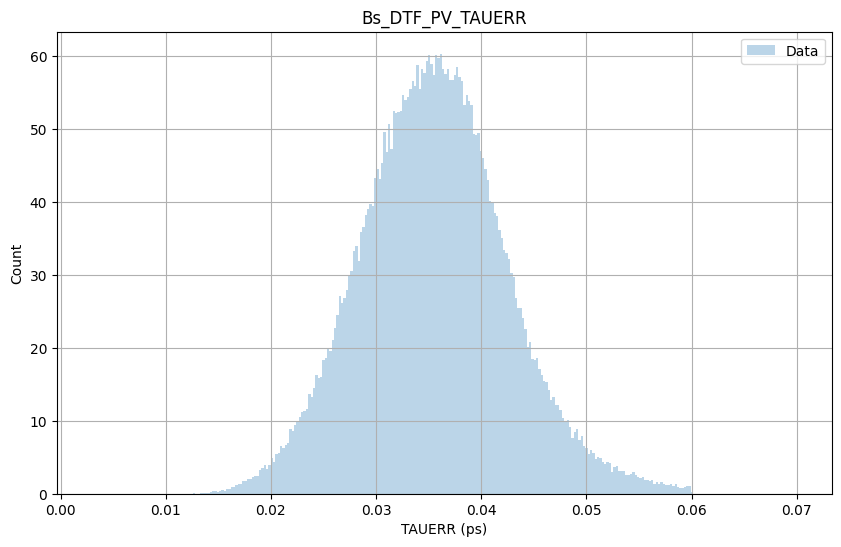

In [17]:

ini_cut = combined_df_prompt[(combined_df_prompt['Bs_DTF_PV_TAUERR (ps)'] > 0.012) & (combined_df_prompt['Bs_DTF_PV_TAUERR (ps)'] < 0.06)]
Ctau_data = ini_cut ['Bs_DTF_PV_TAUERR (ps)']
quantiles_prompt = np.quantile(Ctau_data, num)
print(quantiles_prompt)

plt.figure(figsize=(10, 6))
plt.hist(Ctau_data  , bins=300, range=(0.003, 0.07), density=True, alpha=0.3, label='Data')
plt.title("Bs_DTF_PV_TAUERR")
plt.xlabel("TAUERR (ps)")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()

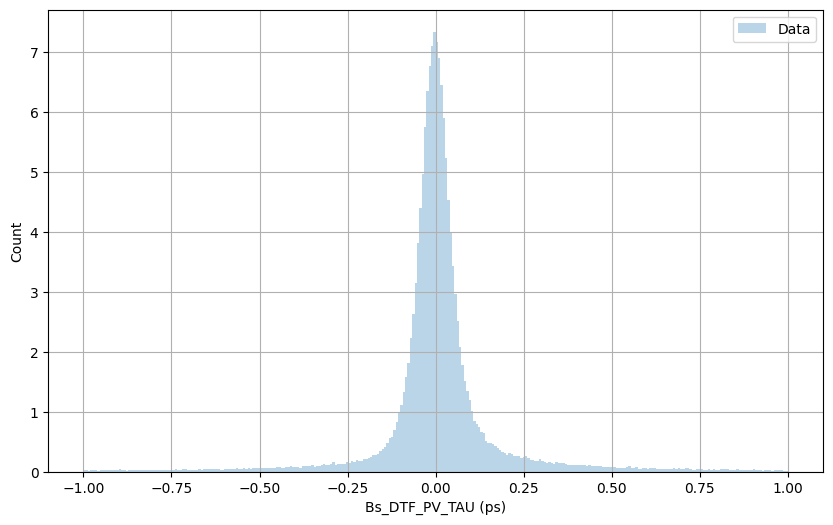

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(combined_df_prompt['Bs_DTF_PV_TAU (ps)']  , bins=300, range=(-1, 1), density=True, alpha=0.3, label='Data')
plt.title("")
plt.xlabel("Bs_DTF_PV_TAU (ps)")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()

Bin 1 (0.01218 to 0.01887) contains 936 data points.
Bin 2 (0.01887 to 0.02030) contains 919 data points.
Bin 3 (0.02030 to 0.02127) contains 937 data points.
Bin 4 (0.02127 to 0.02201) contains 919 data points.
Bin 5 (0.02201 to 0.02261) contains 937 data points.
Bin 6 (0.02261 to 0.02312) contains 919 data points.
Bin 7 (0.02312 to 0.02359) contains 937 data points.
Bin 8 (0.02359 to 0.02400) contains 919 data points.
Bin 9 (0.02400 to 0.02437) contains 937 data points.
Bin 10 (0.02437 to 0.02443) contains 167 data points.
Bin 11 (0.02443 to 0.02487) contains 1154 data points.
Bin 12 (0.02487 to 0.02524) contains 1137 data points.
Bin 13 (0.02524 to 0.02560) contains 1153 data points.
Bin 14 (0.02560 to 0.02593) contains 1137 data points.
Bin 15 (0.02593 to 0.02623) contains 1154 data points.
Bin 16 (0.02623 to 0.02651) contains 1154 data points.
Bin 17 (0.02651 to 0.02676) contains 1137 data points.
Bin 18 (0.02676 to 0.02703) contains 1154 data points.
Bin 19 (0.02703 to 0.02727) c

/opt/anaconda3/envs/root-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


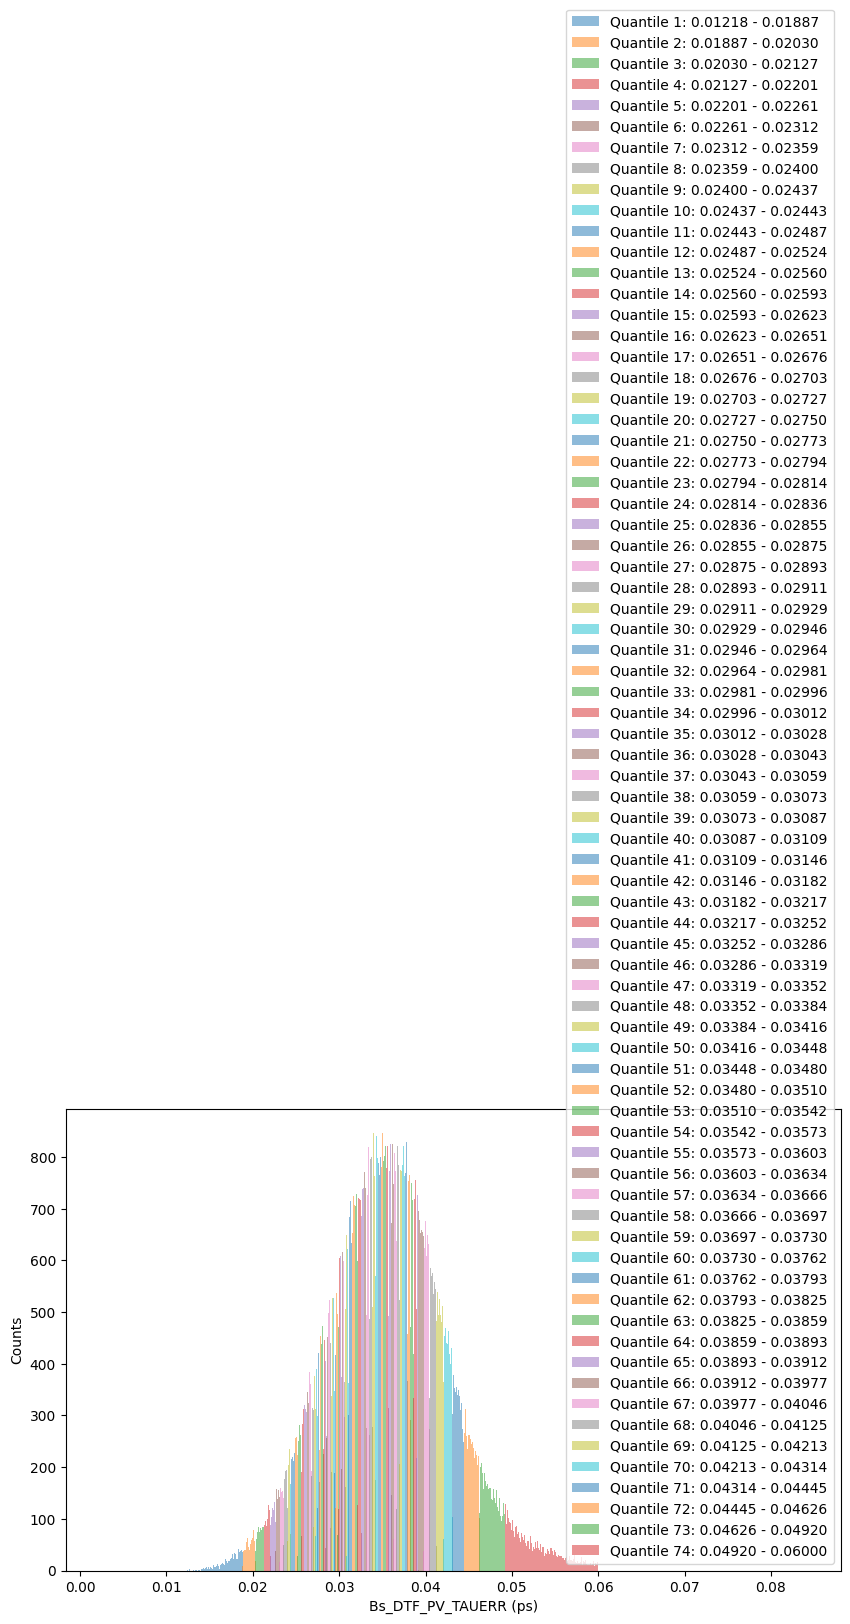

In [19]:
fitting_result_prompt = quantiles_cutting_cal('Bs_DTF_PV_TAUERR (ps)','Bs_DTF_PV_TAU (ps)',quantiles_prompt, 
                                       combined_df_prompt,cut_on_condata=[0.003, 0.07],cut_on_quantity = [-0.1,0.1]
                                         ,fitting_plots=False)

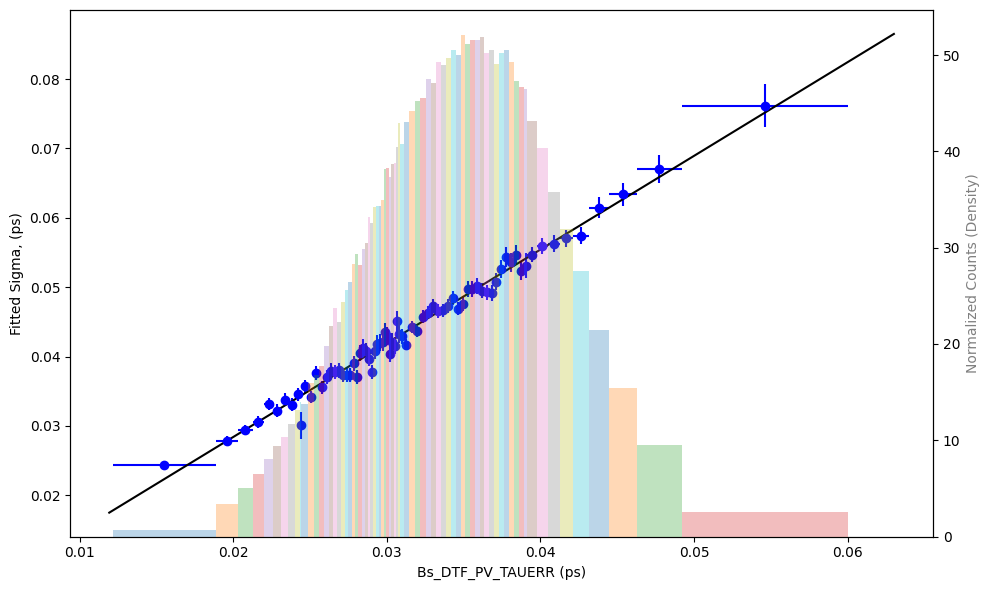

In [20]:
cali_sigma_prompt = sig_vs_sig_t('Bs_DTF_PV_TAUERR (ps)','Bs_DTF_PV_TAU (ps)',combined_df_prompt,quantiles_prompt,
                                 fitting_result_prompt,y_unit='ps')

# selected_condition_quantity, filtered_quantity,combined_df, quantilesfitting_results,xyplot=False, x_unit=None, y_unit=None)

The difference between TAUERR and sigma are due to the assumption we made.

/var/folders/lg/sm4b58wn6gn_45ytw5wczs8h0000gn/T/ipykernel_47397/928050503.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


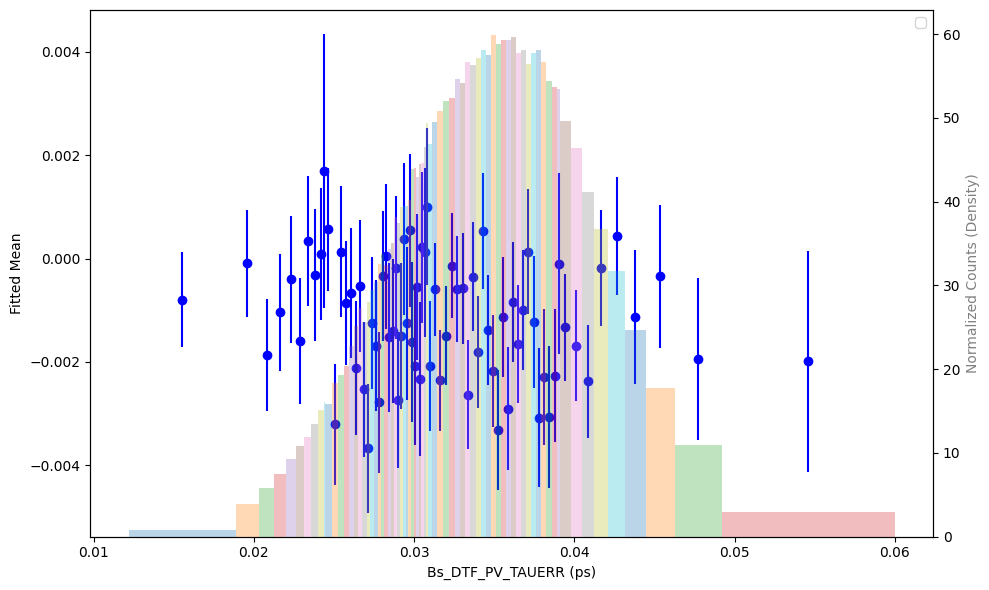

In [21]:
mean_vs_sig_t('Bs_DTF_PV_TAUERR (ps)','Bs_DTF_PV_TAU (ps)',quantiles_prompt, combined_df_prompt,fitting_result_prompt)

#quantiles,combined_df,x_unit=None,y_unit=None

## RunNumber

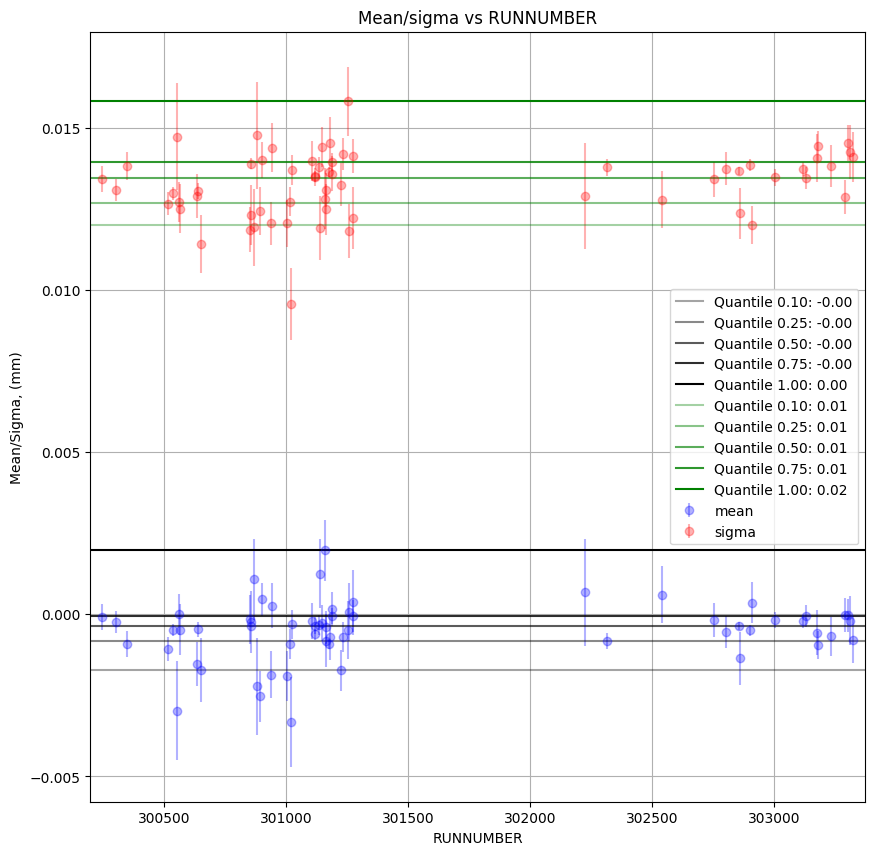

In [22]:
fitting_result = runnumber_cutting_cal('Bs_DTF_PV_CTAU', combined_df_prompt, fitting_plots=False,simple_cal = False,y_unit='mm')

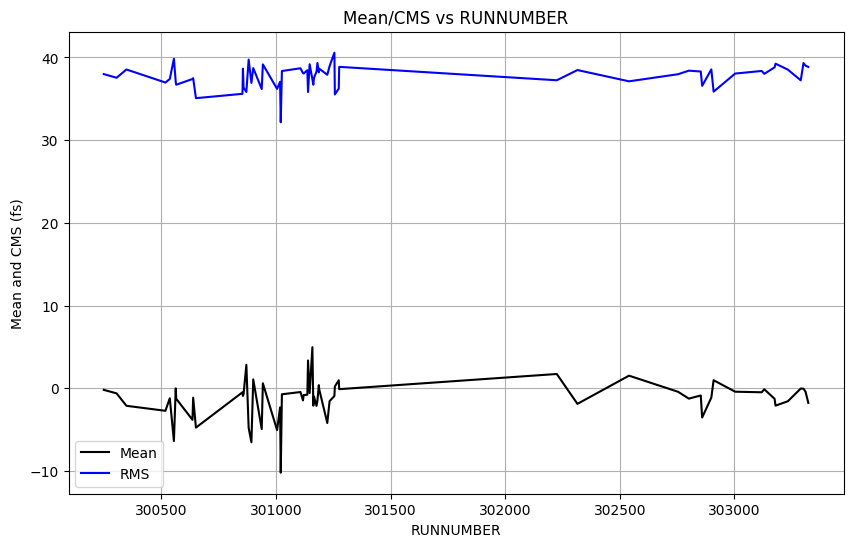

In [23]:
_,_ = runnumber_cutting_cal('Bs_DTF_PV_CTAU', combined_df_prompt, fitting_plots=False,simple_cal = True)

##### RMS 大但 mean 很小通常意味着数据波动较大，但数据在正负两侧分布较均匀，导致均值接近零。

# MC Data

In [24]:
prompt_paths = [
    "root://eoslhcb.cern.ch//eos/lhcb/grid/prod/lhcb/anaprod/lhcb/MC/2024/MC.ROOT/00237559/0000/00237559_00000001_1.mc.root",
    "root://eoslhcb.cern.ch//eos/lhcb/grid/prod/lhcb/anaprod/lhcb/MC/2024/MC.ROOT/00237560/0000/00237560_00000001_1.mc.root"
]
braches=["Bs_DTF_PV_CTAU", "Bs_DTF_PV_CTAUERR","Bs_TRUE_LIFETIME","Bs_BPVLTIME","NPVs"]
tree_path = "BsToJpsiPhi_Detached/DecayTree"

combined_df_mcdata = data_extraction_root_to_pd(prompt_paths,braches,tree_path)

In [25]:

branch_list = combined_mcdata.GetListOfBranches()

for branch in branch_list:
    print(branch.GetName())


NPVs
ALLPVX
ALLPVY
ALLPVZ
BUNCHCROSSING_ID
BUNCHCROSSING_TYPE
EVENTNUMBER
GPSTIME
Hlt1D2KKDecision
Hlt1D2KPiDecision
Hlt1D2PiPiDecision
Hlt1DiMuonHighMassDecision
Hlt1DiMuonLowMassDecision
Hlt1DiMuonNoIPDecision
Hlt1DiMuonNoIP_ssDecision
Hlt1DiMuonSoftDecision
Hlt1DisplacedDiMuonDecision
Hlt1DisplacedLeptonsDecision
Hlt1GECPassthroughDecision
Hlt1KsToPiPiDecision
Hlt1LowPtDiMuonDecision
Hlt1LowPtMuonDecision
Hlt1OneMuonDecision
Hlt1OneMuonTrackLineDecision
Hlt1PassthroughDecision
Hlt1SingleHighEtDecision
Hlt1SingleHighPtMuonDecision
Hlt1TrackMVADecision
Hlt1TrackMuonMVADecision
Hlt1TwoTrackKsDecision
Hlt1TwoTrackMVACharmXSecDecision
Hlt1TwoTrackMVADecision
Hlt1_TCK
Hlt2B2CC_BdToJpsiKstar_JpsiToMuMu_DetachedDecision
Hlt2B2CC_BsToJpsiPhiDecision
Hlt2B2CC_BsToJpsiPhi_DetachedDecision
Hlt2B2CC_BsToJpsiPhi_ExtraMuonDecision
Hlt2B2CC_BsToJpsiPhi_JpsiToEE_DetachedDecision
Hlt2B2CC_BuToJpsiKplus_JpsiToMuMu_DetachedDecision
Hlt2B2OC_BdToDsmPi_DsmToKpKmPimDecision
Hlt2_TCK
NLongTracks
NPV
ODINTC

In [26]:
# filter and skip Bs_TRUE_LIFETIME = 0
combined_df_mcdata['T_Diff (ps)'] = combined_df_mcdata.apply(
    lambda row: (row['Bs_DTF_PV_CTAU'] / 0.3 - row['Bs_TRUE_LIFETIME'] * 1000) if row['Bs_TRUE_LIFETIME'] != 0 else None, 
    axis=1
)

combined_df_mcdata['Bs_DTF_PV_TAUERR (ps)'] =combined_df_mcdata['Bs_DTF_PV_CTAUERR']/0.3

In [27]:
zero_count = (combined_df_mcdata['Bs_TRUE_LIFETIME'] == 0).sum()
print(f"Number of rows where Bs_TRUE_LIFETIME is 0: {zero_count}")

Number of rows where Bs_TRUE_LIFETIME is 0: 1


In [28]:
combined_df_mcdata

,Bs_DTF_PV_CTAU,Bs_DTF_PV_CTAUERR,Bs_TRUE_LIFETIME,Bs_BPVLTIME,NPVs,T_Diff (ps),Bs_DTF_PV_TAUERR (ps)
0,0.191151,0.010079,0.000577,0.000638,7,0.060593,0.033597
1,0.589453,0.009223,0.001895,0.001964,6,0.069633,0.030745
2,1.372182,0.008338,0.004560,0.004578,4,0.014257,0.027792
3,0.205440,0.012108,0.000607,0.000685,4,0.077324,0.040360
4,0.538654,0.013237,0.000809,0.001796,8,0.986694,0.044124
...,...,...,...,...,...,...,...
327805,0.245999,0.010793,0.000883,0.000821,7,-0.062814,0.035978
327806,0.341314,0.006621,0.001137,0.001139,2,0.000478,0.022068
327807,0.060710,0.009540,0.000221,0.000203,7,-0.018993,0.031800
327808,0.146705,0.005284,0.000501,0.000489,7,-0.012202,0.017614


In [29]:
num = np.concatenate([np.round(np.linspace(0,0.05,10),4),np.round(np.linspace(0.051,0.25,30),4),
                     np.round(np.linspace(0.26,0.7,25),4),np.round(np.linspace(0.71,1,10),4)])

[0.01306295 0.01678246 0.01774007 0.01839486 0.01890558 0.01932184
 0.01967677 0.02001245 0.0203137  0.02060101 0.02064563 0.02095406
 0.02125072 0.02151958 0.02178383 0.02203148 0.02227229 0.02249679
 0.02271393 0.02292543 0.0231275  0.0233208  0.02350836 0.0236897
 0.02387486 0.02404954 0.02422005 0.02438768 0.02454922 0.02470637
 0.02486472 0.0250228  0.02517988 0.02533507 0.02548344 0.02562921
 0.0257755  0.02592014 0.02606458 0.02621457 0.02641859 0.02678983
 0.02715515 0.02750803 0.02785418 0.02820713 0.02854535 0.02888795
 0.02922822 0.02956631 0.02990847 0.03024816 0.0305788  0.03092136
 0.03126789 0.03161983 0.0319801  0.03233414 0.03269666 0.03306368
 0.03343696 0.03381219 0.03419201 0.03458008 0.03498104 0.03520279
 0.03593495 0.0367251  0.03756318 0.03849344 0.03958464 0.04088906
 0.04266455 0.04561234 0.05999612]


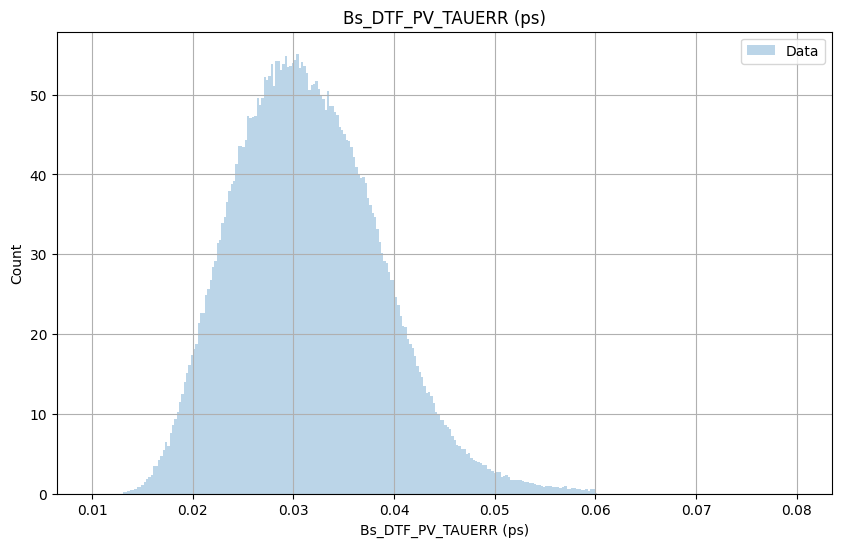

In [30]:
ini_cut = combined_df_mcdata[(combined_df_mcdata['Bs_DTF_PV_TAUERR (ps)'] > 0.013) & (combined_df_mcdata['Bs_DTF_PV_TAUERR (ps)'] < 0.06)]
Ctau_data = ini_cut['Bs_DTF_PV_TAUERR (ps)']
quantiles_mcdata = np.quantile(Ctau_data, num )
print(quantiles_mcdata )

plt.figure(figsize=(10, 6))
plt.hist(Ctau_data  , bins=300, range=(0.01, 0.08), density=True, alpha=0.3, label='Data')
plt.title("Bs_DTF_PV_TAUERR (ps)")
plt.xlabel("Bs_DTF_PV_TAUERR (ps)")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()

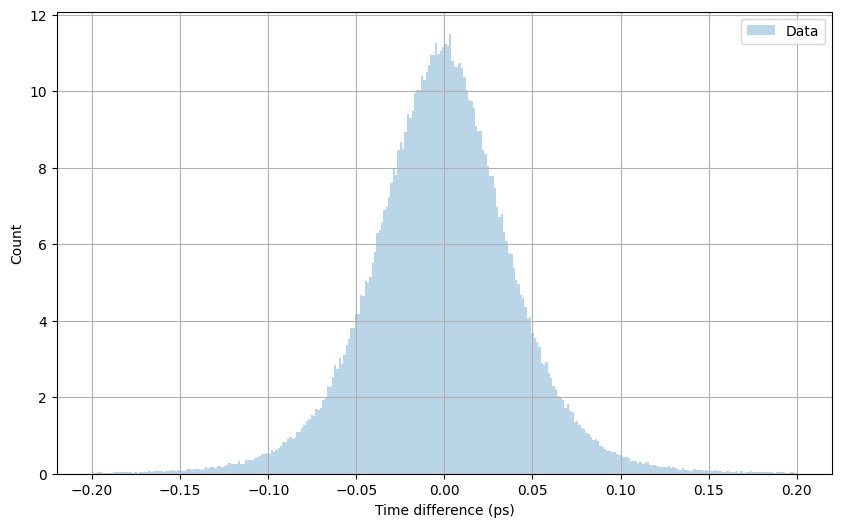

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(combined_df_mcdata['T_Diff (ps)']  , bins=300, range=(-0.2, 0.2), density=True, alpha=0.3, label='Data')
plt.title("")
plt.xlabel("Time difference (ps)")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()

Bin 1 (0.01306 to 0.01678) contains 1828 data points.
Bin 2 (0.01678 to 0.01774) contains 1796 data points.
Bin 3 (0.01774 to 0.01839) contains 1828 data points.
Bin 4 (0.01839 to 0.01891) contains 1796 data points.
Bin 5 (0.01891 to 0.01932) contains 1828 data points.
Bin 6 (0.01932 to 0.01968) contains 1796 data points.
Bin 7 (0.01968 to 0.02001) contains 1829 data points.
Bin 8 (0.02001 to 0.02031) contains 1795 data points.
Bin 9 (0.02031 to 0.02060) contains 1829 data points.
Bin 10 (0.02060 to 0.02065) contains 326 data points.
Bin 11 (0.02065 to 0.02095) contains 2253 data points.
Bin 12 (0.02095 to 0.02125) contains 2220 data points.
Bin 13 (0.02125 to 0.02152) contains 2253 data points.
Bin 14 (0.02152 to 0.02178) contains 2221 data points.
Bin 15 (0.02178 to 0.02203) contains 2252 data points.
Bin 16 (0.02203 to 0.02227) contains 2253 data points.
Bin 17 (0.02227 to 0.02250) contains 2221 data points.
Bin 18 (0.02250 to 0.02271) contains 2252 data points.
Bin 19 (0.02271 to 0

/opt/anaconda3/envs/root-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


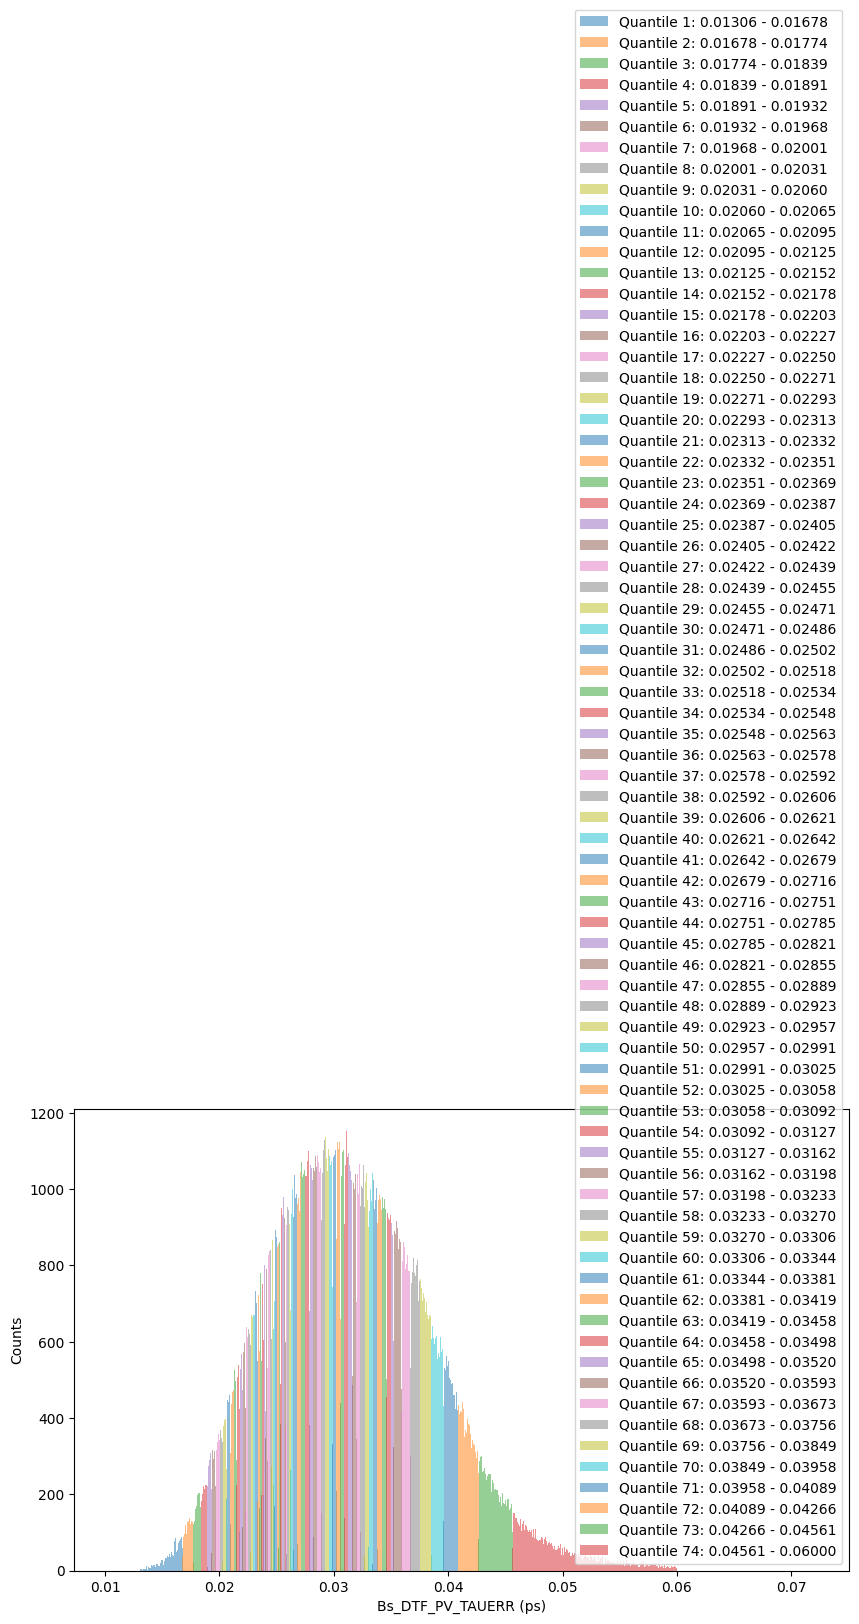

In [32]:
fitting_result_mcdata = quantiles_cutting_cal('Bs_DTF_PV_TAUERR (ps)','T_Diff (ps)',quantiles_mcdata, 
                                       combined_df_mcdata,cut_on_condata=[0.013,0.06],cut_on_quantity = [-0.15,0.15],
                                             fitting_plots=False)

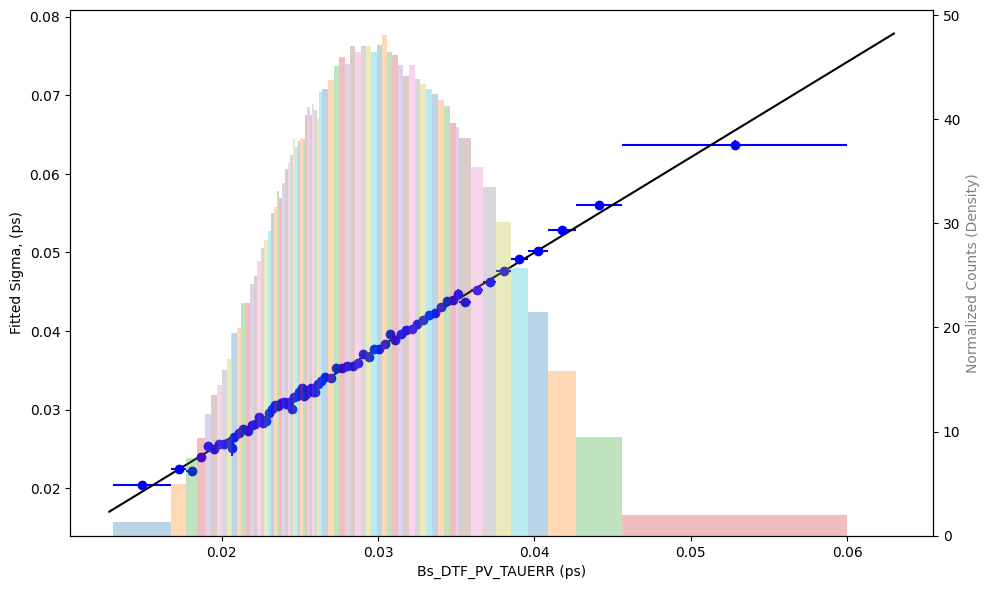

In [33]:
cali_sigma_mcdata = sig_vs_sig_t('Bs_DTF_PV_TAUERR (ps)','T_Diff (ps)',combined_df_mcdata,quantiles_mcdata,
                                 fitting_result_mcdata,y_unit='ps')

# selected_condition_quantity, filtered_quantity,combined_df, quantilesfitting_results,xyplot=False, x_unit=None, y_unit=None)

# quantiles,combined_df,sigmas,mid_bin_point,sigma_err_bar 

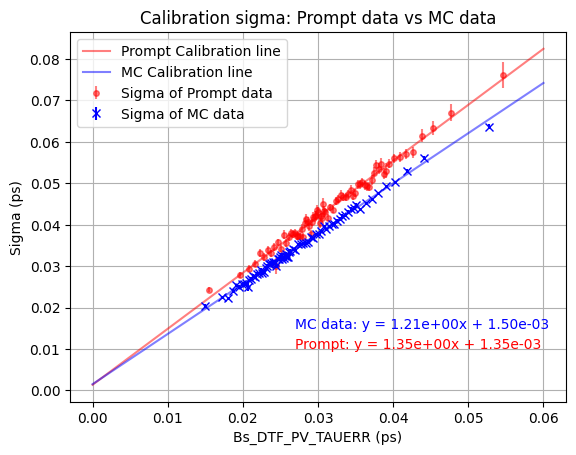

In [34]:
extended_x = np.linspace( 0, 0.06, 100) 
# extended_x = np.linspace(0, 0.01, 100)
fit_line_prompt = np.polyval(cali_sigma_prompt, extended_x)
fit_line_mcdata = np.polyval(cali_sigma_mcdata, extended_x)

# Plot the fitted lines
plt.plot(extended_x, fit_line_prompt, color='r', linestyle='-',  alpha=0.5,label='Prompt Calibration line')
plt.errorbar(fitting_result_prompt['mid_bin_point'],fitting_result_prompt['sigma'], yerr=fitting_result_prompt['sigma_error'], markersize=4,alpha=0.5,fmt='o', color='red',label='Sigma of Prompt data')
plt.plot(extended_x, fit_line_mcdata, color='b', linestyle='-', alpha=0.5,label='MC Calibration line')
plt.errorbar(fitting_result_mcdata['mid_bin_point'],fitting_result_mcdata['sigma'], yerr=fitting_result_mcdata['sigma_error'], fmt='x', color='blue',label='Sigma of MC data')

# Extract the fit parameters for annotation
a_prompt, b_prompt = cali_sigma_prompt
a_mc, b_mc = cali_sigma_mcdata

# Annotate the plot with the equations for each line
plt.text(0.027, 0.01, f'Prompt: y = {a_prompt:.2e}x + {b_prompt:.2e}', color='r', fontsize=10)
plt.text(0.027, 0.015, f'MC data: y = {a_mc:.2e}x + {b_mc:.2e}', color='b', fontsize=10)

# Customize the plot
plt.title("Calibration sigma: Prompt data vs MC data")
plt.xlabel("Bs_DTF_PV_TAUERR (ps)")
plt.ylabel("Sigma (ps)")
#plt.xlim(0, 0.011)
#plt.ylim(0, 0.04)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [35]:
cali_sigma_mcdata

array([1.21182017, 0.00150336])

In [36]:
d_m_B_ps = 17.765 #ps-1, ps-1*J⋅s=J
d_m_B_mev = 1.1693 *(10**-8)*(10**6) # MeV

# Dilution Function

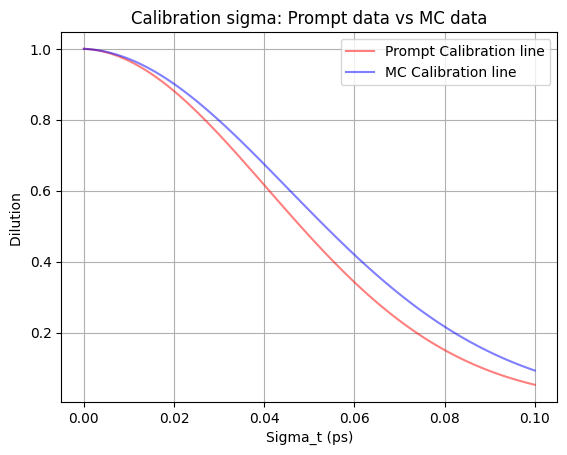

In [37]:
extended_x = np.linspace( 0, 0.1, 100) 

# Plot the fitted lines
plt.plot(extended_x, np.exp(-((np.polyval(cali_sigma_prompt, extended_x ) * d_m_B_ps) ** 2) / 2), color='r', 
         linestyle='-',  alpha=0.5,label='Prompt Calibration line')
plt.plot(extended_x,  np.exp(-((np.polyval(cali_sigma_mcdata, extended_x ) * d_m_B_ps) ** 2) / 2), color='b', 
         linestyle='-', alpha=0.5,label='MC Calibration line')

# Customize the plot
plt.title("Calibration sigma: Prompt data vs MC data")
plt.xlabel("Sigma_t (ps)")
plt.ylabel("Dilution ")
#plt.xlim(0, 0.011)
#plt.ylim(0, 0.04)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


$$ D_{cali}=e^{-\frac{1}{2}\sigma_{cali}^2\Delta m_s^2} $$
$$ D_{eff} = \sqrt{\frac{1}{N}\sum D_{cali}^2}=\sqrt{\frac{1}{N}\sum{(e^{-\frac{1}{2}\sigma_{cali}^2\Delta m_s^2}})^2}$$
$$ \sigma_{eff}=\sqrt{-2ln(D_{eff})/\Delta m^2} $$

The t we use here is ctau

In [38]:
def array_sigma_eff (fit_params, sigma, d_m_B_ps):
    '''
    calculation of sigma_eff
    we are not using cos form.
    
    Note: sigma is the binning sigma (from cutting)
    
    return: array of sigma_eff
    '''
    #  cali_sigma
    cali_sigma = np.polyval(fit_params, sigma)
    #  D_tr
    D_tr = np.exp(-((cali_sigma * d_m_B_ps) ** 2) / 2) 

    
    # effective sigma
    sigma_eff = np.sqrt(-2 * np.log(D_tr) / (d_m_B_ps ** 2))  
    return sigma_eff

In [39]:
def calculate_exp_dilution_and_sigma(fit_params, sigma, d_m_B_ps):
    '''
    calculation of D_average (exp form) and D_eff 
    we are not using cos form.
    
    Note: Tauerr = uncali sigma
    
    return: D_average, D_eff, sigma_eff
    '''
    #  cali_sigma
    cali_sigma = np.polyval(fit_params, sigma)
    #  D_average
    D_average = np.sum(np.exp(-((cali_sigma * d_m_B_ps) ** 2) / 2)) / len(sigma)
    
    # D_tr 和 D_eff_mcdata
    D_tr = np.exp(-((cali_sigma * d_m_B_ps) ** 2) / 2)
    D_eff = np.sqrt(np.sum(D_tr ** 2) / len(sigma))
    
    print('D_cali:', D_average, '. Eff_D:', D_eff)
    
    # effective sigma
    sigma_eff = np.sqrt(-2 * np.log(D_eff) / (d_m_B_ps ** 2))
    print('Effective sigma:', sigma_eff, 'ps')
    
    return D_average, D_eff, sigma_eff

In [40]:
print('For prompt data')
print('-------- Prompt calibration with prompt data --------')
_,_,_=calculate_exp_dilution_and_sigma(cali_sigma_prompt, combined_df_prompt['Bs_DTF_PV_TAUERR (ps)'],d_m_B_ps)

For prompt data
-------- Prompt calibration with prompt data --------
D_cali: 0.674548723192354 . Eff_D: 0.6826846334434985
Effective sigma: 0.04918396435817232 ps


In [41]:
1/len(combined_df_prompt['Bs_DTF_PV_TAUERR (ps)'])*np.sum((np.cos(combined_df_prompt['Bs_DTF_PV_TAUERR (ps)']*d_m_B_ps)-0.68)**2)

0.02234848570650589

In [42]:
print('For mc data')
print('-------- MC calibration with MC data --------')
_,_,_=calculate_exp_dilution_and_sigma(cali_sigma_mcdata, combined_df_mcdata['Bs_DTF_PV_TAUERR (ps)'],d_m_B_ps)

For mc data
-------- MC calibration with MC data --------
D_cali: 0.7746333223968032 . Eff_D: 0.7797739072137844
Effective sigma: 0.039703832864551154 ps


In [43]:
print('-------- Prompt calibration with MC data --------')
_,_,_=calculate_exp_dilution_and_sigma(cali_sigma_prompt, combined_df_mcdata['Bs_DTF_PV_TAUERR (ps)'],d_m_B_ps)

-------- Prompt calibration with MC data --------
D_cali: 0.7325180905632435 . Eff_D: 0.7396166768294901
Effective sigma: 0.04372020404026967 ps


In [44]:
fitting_params_Generalprompt = gaussfit_without_BG('Bs_DTF_PV_TAU (ps)',combined_df_prompt,[-0.1,0.1],plot=False)
# fitting_quantity, combined_df,cut_on_data,plot=False):

$$D_{eff,mcdata} = \frac{1}{N}\sum_{all\ event}cos((t-t_{true}) * \Delta m_s)$$
$$D_{eff,prompt} = \frac{1}{N}\sum_{t<t-\mu}cos(t * \Delta m_s)$$
$$ \sigma_{eff}=\sqrt{-2ln(D_{eff})/\Delta m^2} $$


In [45]:
def calculate_cos_dilution (time,d_m_B_ps):

    D_eff = 1/len(time)*np.sum(np.cos(time*d_m_B_ps))
    
    sigma_eff = np.sqrt(-2 * np.log(D_eff) / (d_m_B_ps ** 2))

    return D_eff, sigma_eff 
    

In [46]:
print('For mc data, the effective dilution and effective are sigma:')
print(calculate_cos_dilution(combined_df_mcdata['T_Diff (ps)'],d_m_B_ps))


For mc data, the effective dilution and effective are sigma:
(0.7312594205549224, 0.04453617697850764)


In [47]:
cut_df_c = combined_df_prompt[ (combined_df_prompt['Bs_DTF_PV_TAU (ps)'] <= fitting_params_Generalprompt['mean']['value'])]
cut_df_more = combined_df_prompt[ (combined_df_prompt['Bs_DTF_PV_TAU (ps)'] >= -0.1) & (combined_df_prompt['Bs_DTF_PV_TAU (ps)'] <= fitting_params_Generalprompt['mean']['value'])]
cut_df_prompt = cut_df_c['Bs_DTF_PV_TAU (ps)']-fitting_params_Generalprompt['mean']['value']
cut_df_more = cut_df_more ['Bs_DTF_PV_TAU (ps)']
print('For prompt data, the effective dilution and effective are sigma:')
print(calculate_cos_dilution(cut_df_prompt,d_m_B_ps))
print('For further cut prompt data, the effective dilution and effective are sigma:',calculate_cos_dilution(cut_df_more,d_m_B_ps))

For prompt data, the effective dilution and effective are sigma:
(0.5170545926266701, 0.06465354656518701)
For further cut prompt data, the effective dilution and effective are sigma: (0.7390970432357878, 0.04377111107005023)


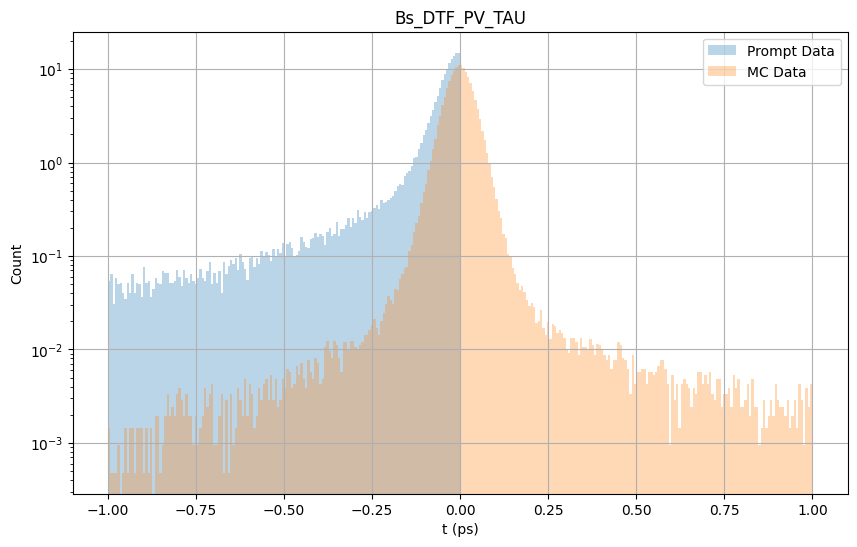

In [48]:
plt.figure(figsize=(10, 6))
plt.hist(cut_df_prompt , bins=300, density=True, alpha=0.3, range=(-1,1),label='Prompt Data')
plt.hist(combined_df_mcdata['T_Diff (ps)']  , bins=300, density=True, range=(-1,1), alpha=0.3, label='MC Data')
plt.title("Bs_DTF_PV_TAU")
plt.xlabel("t (ps)")
plt.ylabel("Count")
plt.legend()
plt.yscale('log')
plt.grid(True)
plt.show()

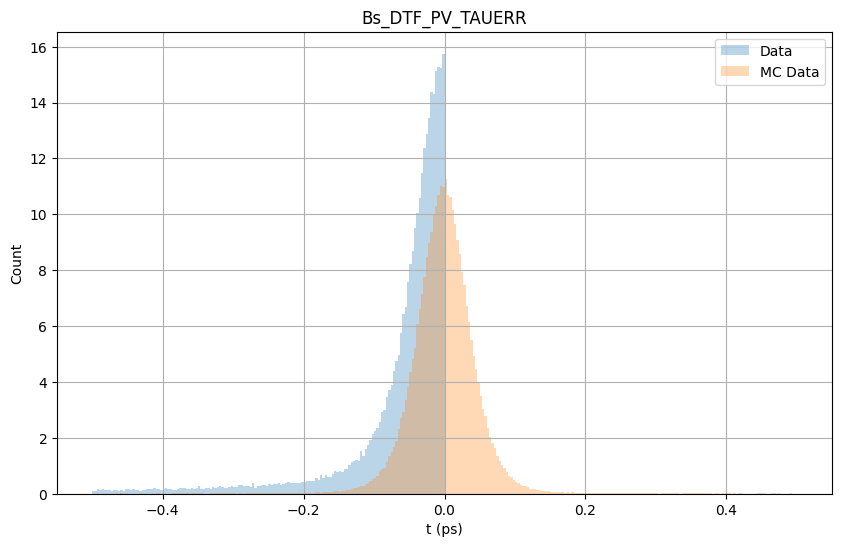

In [49]:
plt.figure(figsize=(10, 6))
plt.hist(cut_df_prompt , bins=300, range=(-0.5, 0.5), density=True, alpha=0.3, label='Data')
plt.hist(combined_df_mcdata['T_Diff (ps)']  , bins=300, range=(-0.5, 0.5), density=True, alpha=0.3, label='MC Data')
plt.title("Bs_DTF_PV_TAUERR")
plt.xlabel("t (ps)")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()

In [50]:
sigma_eff_prompt = array_sigma_eff(cali_sigma_prompt, fitting_result_prompt['sigma'],d_m_B_ps)
sigma_eff_mcdata = array_sigma_eff(cali_sigma_mcdata, fitting_result_mcdata['sigma'],d_m_B_ps)

# Cuttting for $\sigma_{eff}$ (from $D_{eff}$) vs TAUERR

$$D_{eff,mcdata} = \frac{1}{N}\sum_{all\ event}cos((t-t_{true}) * \Delta m_s)$$
$$D_{eff,prompt} = \frac{1}{N}\sum_{t<t-\mu}cos(t * \Delta m_s)$$
$$ \sigma_{eff}=\sqrt{-2ln(D_{eff})/\Delta m^2} $$

In [123]:
def quantiles_cutting_data (selected_condition_quantity, filtered_quantity, combined_df, quantiles, cut_on_condata,cut_on_quantity, nbin):
    """
    cut on Ctauerr and getting

    Returns:
    dict:  cutting_results
    """
    
    cutting_results = {
        'cut_data':[],
        "quantile_range": [],
        "width_bar": [],
        "mid_bin_point": []
    }
######################### Fitting ######################### 
    for i in range(len(quantiles) - 1):
        # Data processing
        
        cut_df = combined_df[
            (combined_df[selected_condition_quantity] > quantiles[i]) & 
            (combined_df[selected_condition_quantity] <= quantiles[i + 1])
        ]
        cut_data = cut_df[filtered_quantity]
        cut_data_filtered = cut_data[(cut_data >= cut_on_quantity[0]) & (cut_data <= cut_on_quantity[1])]
        
######################### Cutting parameters ######################### 

        # Append results to the dictionary
        cutting_results["cut_data"].append(cut_data_filtered)
        cutting_results["quantile_range"].append((quantiles[i], quantiles[i + 1]))
        cutting_results["width_bar"].append((quantiles[i+1] - quantiles[i]) / 2)
        cutting_results["mid_bin_point"].append(quantiles[i] + (quantiles[i+1] - quantiles[i]) / 2)

######################### colourfull histogram ######################### 
    data = combined_df[selected_condition_quantity].values
    binned_data = []

    # go through all quantile，and extract wanted range of filtered_quantity
    for i in range(len(quantiles) - 1):
        cut_df = combined_df[(combined_df[selected_condition_quantity] > quantiles[i]) & (combined_df[selected_condition_quantity] <= quantiles[i + 1])]
        Ctau_data = cut_df[selected_condition_quantity].values
        binned_data.append(Ctau_data)
   #     print(f"Bin {i+1} ({quantiles[i]:.5f} to {quantiles[i+1]:.5f}) contains {len(Ctau_data)} data points.")

    plt.figure(figsize=(10, 6))
    
    for i in range(len(binned_data)):
     #   plt.hist(binned_data[i], bins=1000, alpha=0.5,  label=f'Quantile {i+1}: {quantiles[i]:.5f} - {quantiles[i+1]:.5f}')
        plt.hist(binned_data[i], bins=nbin, range=(cut_on_condata[0]*0.8, cut_on_condata[1]*1.2), alpha=0.5)

    plt.xlabel(selected_condition_quantity)
    plt.ylabel('Counts')
#    plt.legend()
    plt.show()    

    return cutting_results

### Uncertainty propagation

$$ \bar{var}(D_{eff})=\frac{1}{N-1}\sum_i(cos(\Delta mt)_i-\bar D_{eff})^2$$
$$ \sigma_{\sigma_{eff}}^2=\left(\frac{\partial \sigma_{eff}}{\partial D_{eff}} \right)^2 \sigma_D^2+\left(\frac{\partial \sigma_{eff}}{\partial \Delta m} \right)^2 \sigma_{\Delta m}^2$$
Since $\Delta m$ here is a constant, no error contribution, thus ignore the second term.

$$ \frac{\partial \sigma_{eff}}{\partial D_{eff}} = \frac{\partial}{\partial D_{eff}} \left( \sqrt{\frac{-2ln(D_{eff})}{\Delta m^2}} \right) = \frac{-1}{\sqrt{-2ln(D_{eff})\Delta m^2}}\cdot\frac{-2}{D_{eff}}\cdot\frac{1}{2}$$
$$ \frac{\partial \sigma_{eff}}{\partial D_{eff}} = \frac{1}{D_{eff}\sqrt{-2ln(D_{eff})\Delta m^2}}$$
$$ \sigma_{\sigma_{eff}}^2=\left(\frac{1}{D_{eff}\sqrt{-2ln(D_{eff})\Delta m^2}} \right)^2 \sigma_D^2 $$

-------
$$ \sigma_{\sigma_{eff}}=\left(\frac{1}{D_{eff}\sqrt{-2ln(D_{eff})\Delta m^2}} \right) \sigma_D $$
with
$$ \sigma_{D}=\sqrt{\frac{\bar{var}(D_{eff})}{N}}$$

In [52]:
def array_sig_eff (time,d_m_B_ps):
    '''

    return: array of sigma_eff and D_eff
    '''
    results = {
        "D_eff": [],
        'sigma_eff':[],
        'sigma(D)':[],
        'sigma(sigma_eff)':[]
    }

    for i in range(len(time)):
        result = calculate_cos_dilution(time[i],d_m_B_ps)
        results["D_eff"].append(result[0])
        results['sigma_eff'].append(result[1])
        # variance  of D_eff

        var = 1/len(time[i]) * np.sum((np.cos(time[i]*d_m_B_ps)-result[0])**2)
        sigma_D = np.sqrt(var/len(time[i]))
        # error propagation
        sigma_sigma_eff = (1/ (result[0] * np.sqrt(-2 * np.log(result[0]) * (d_m_B_ps**2))) )*sigma_D 
 
        
        results['sigma(D)'].append(sigma_D)
        results['sigma(sigma_eff)'].append(sigma_sigma_eff)
        

    
    return results
    

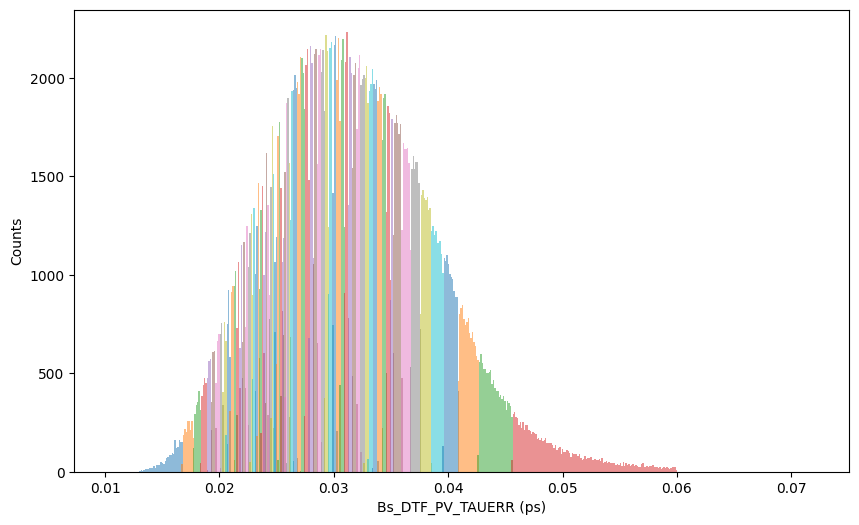

In [124]:
cutting_T_diff = quantiles_cutting_data ('Bs_DTF_PV_TAUERR (ps)', 'T_Diff (ps)', 
                                         combined_df_mcdata,quantiles_mcdata,[0.013,0.06],[-1,1],nbin=500)

In [125]:
sig_eff_arr_mcdata = array_sig_eff(cutting_T_diff['cut_data'],d_m_B_ps)

In [55]:
#num= np.concatenate([np.round(np.linspace(0,0.05,20),4),np.round(np.linspace(0.051,0.25,30),4),np.round(np.linspace(0.26,0.7,25),4),np.round(np.linspace(0.71,1,10),4)])
num= np.round(np.linspace(0,1,80),4)
ini_cut = cut_df_c[(cut_df_c['Bs_DTF_PV_TAUERR (ps)'] > 0.012) & (cut_df_c['Bs_DTF_PV_TAUERR (ps)'] < 0.06)]
Ctau_data = ini_cut ['Bs_DTF_PV_TAUERR (ps)']
quantiles_prompt_cut = np.quantile(Ctau_data, num)
#print(quantiles_prompt)


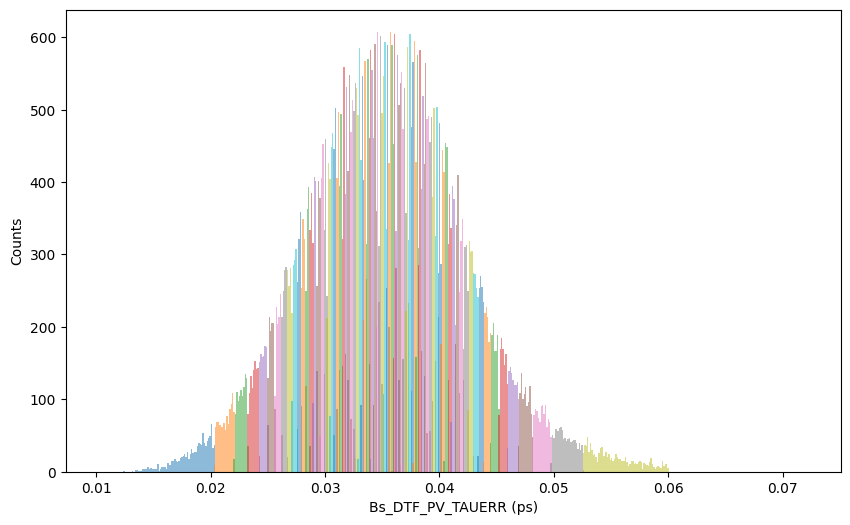

In [56]:
cutting_tau_prompt = quantiles_cutting_data ('Bs_DTF_PV_TAUERR (ps)', 'Bs_DTF_PV_TAU (ps)', 
                                             cut_df_c, quantiles_prompt_cut,[0.013,0.06],[-10,0],nbin=500)

In [57]:
sig_eff_arr_prompt = array_sig_eff(cutting_tau_prompt['cut_data'],d_m_B_ps)

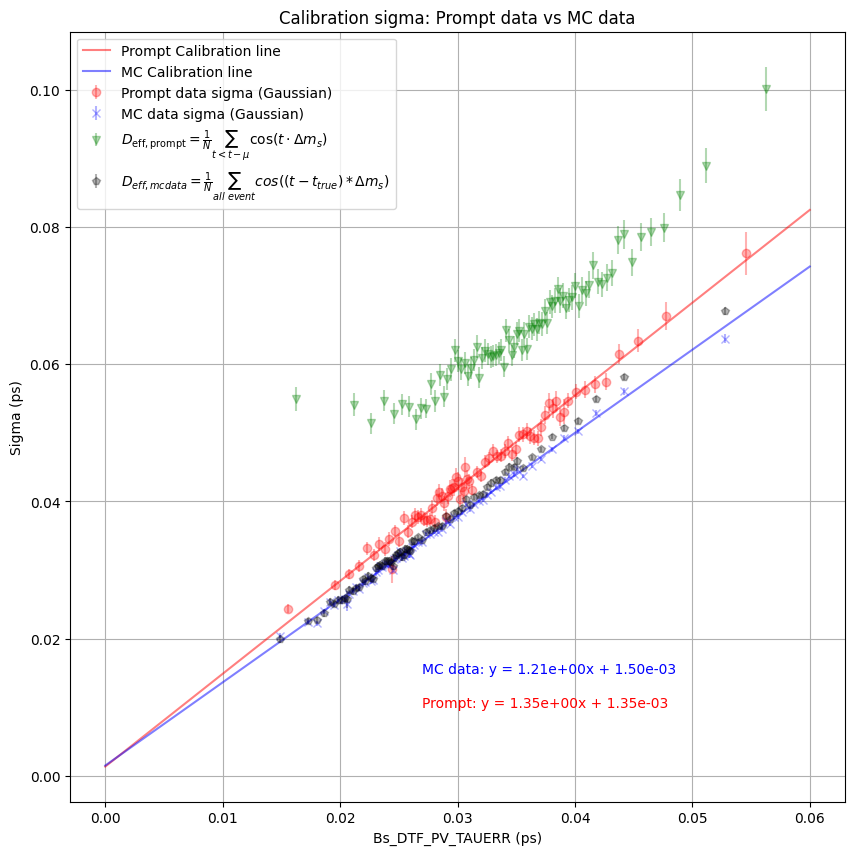

In [126]:
extended_x = np.linspace( 0, 0.06, 100) 
# extended_x = np.linspace(0, 0.01, 100)
fit_line_prompt = np.polyval(cali_sigma_prompt, extended_x)
fit_line_mcdata = np.polyval(cali_sigma_mcdata, extended_x)

# Plot the fitted lines
plt.figure(figsize=(10, 10))
plt.plot(extended_x, fit_line_prompt, color='r', linestyle='-',  alpha=0.5,label='Prompt Calibration line')

plt.errorbar(fitting_result_prompt['mid_bin_point'],fitting_result_prompt['sigma'], 
             yerr=fitting_result_prompt['sigma_error'],alpha=0.3, fmt='o', color='red',label='Prompt data sigma (Gaussian)')

plt.plot(extended_x, fit_line_mcdata, color='b', linestyle='-', alpha=0.5,label='MC Calibration line')

plt.errorbar(fitting_result_mcdata['mid_bin_point'],fitting_result_mcdata['sigma'], 
             yerr=fitting_result_mcdata['sigma_error'],alpha=0.3, fmt='x', color='blue',label='MC data sigma (Gaussian)')

plt.errorbar(cutting_tau_prompt['mid_bin_point'],sig_eff_arr_prompt['sigma_eff'],alpha=0.3, fmt='v', color='green',
             yerr=sig_eff_arr_prompt['sigma(sigma_eff)'],
             label = r'$D_{\mathrm{eff,prompt}} = \frac{1}{N}\sum_{t < t-\mu}\cos(t \cdot \Delta m_s)$'
)
plt.errorbar(cutting_T_diff['mid_bin_point'],sig_eff_arr_mcdata['sigma_eff'], alpha=0.3, fmt='p', color='k',
             yerr=sig_eff_arr_mcdata['sigma(sigma_eff)'],
             label=r'$D_{eff,mcdata} = \frac{1}{N}\sum_{all\ event}cos((t-t_{true}) * \Delta m_s)$')


# Extract the fit parameters for annotation
a_prompt, b_prompt = cali_sigma_prompt
a_mc, b_mc = cali_sigma_mcdata

# Annotate the plot with the equations for each line
plt.text(0.027, 0.01, f'Prompt: y = {a_prompt:.2e}x + {b_prompt:.2e}', color='r', fontsize=10)
plt.text(0.027, 0.015, f'MC data: y = {a_mc:.2e}x + {b_mc:.2e}', color='b', fontsize=10)

# Customize the plot
plt.title("Calibration sigma: Prompt data vs MC data")
plt.xlabel("Bs_DTF_PV_TAUERR (ps)")
plt.ylabel("Sigma (ps)")
#plt.xlim(0, 0.011)
#plt.ylim(0, 0.04)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


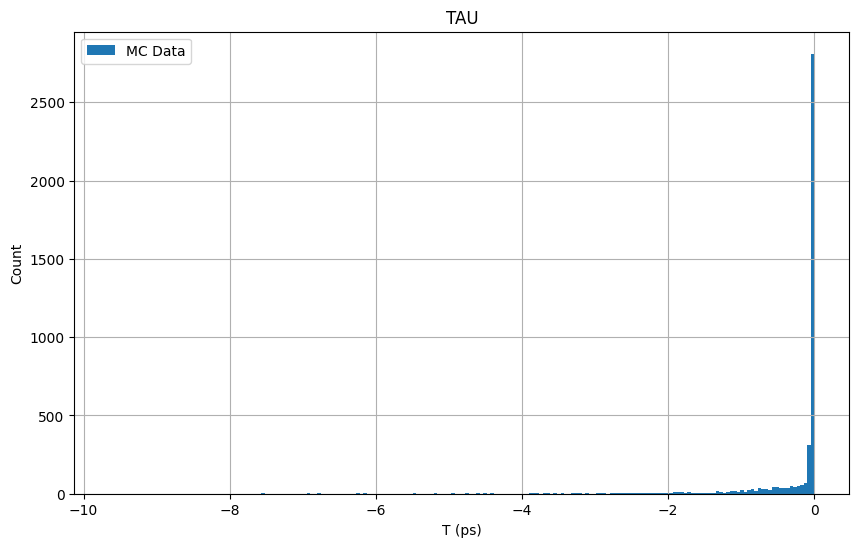

In [59]:
jackknife_data = pd.concat([cutting_tau_prompt['cut_data'][0],cutting_tau_prompt['cut_data'][1],cutting_tau_prompt['cut_data'][2],cutting_tau_prompt['cut_data'][3]])

plt.figure(figsize=(10, 6))
plt.hist(jackknife_data , bins=200, alpha=1, label='MC Data')
plt.title("TAU")
plt.xlabel("T (ps)")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()


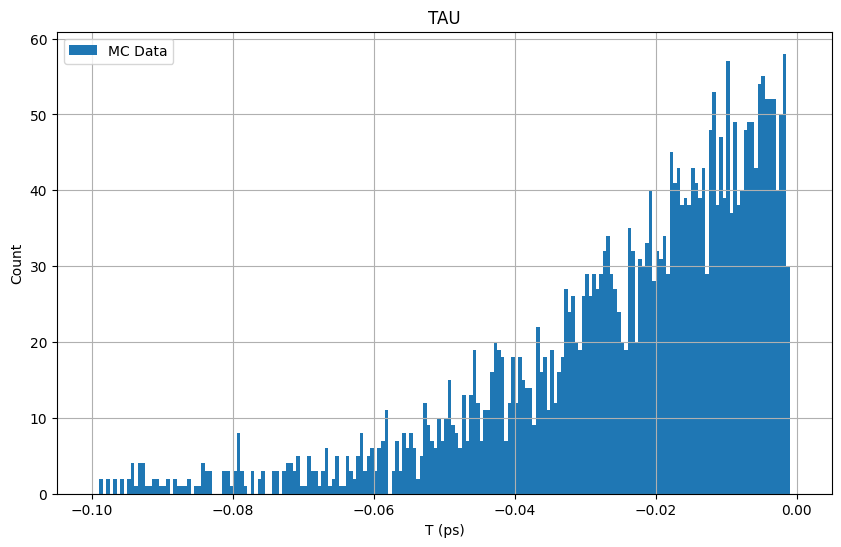

In [60]:
jackknife_data = pd.concat([cutting_tau_prompt['cut_data'][0],cutting_tau_prompt['cut_data'][1],cutting_tau_prompt['cut_data'][2],cutting_tau_prompt['cut_data'][3]])

plt.figure(figsize=(10, 6))
plt.hist(jackknife_data , bins=200, range=(-0.1,0), alpha=1, label='MC Data')
plt.title("TAU")
plt.xlabel("T (ps)")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()


In [147]:
def quantiles_cutting_data (selected_condition_quantity, filtered_quantity, combined_df, quantiles, cut_on_condata,cut_on_quantity, nbin):
    """
    cut on Ctauerr and getting

    Returns:
    dict:  cutting_results
    """
    
    cutting_results = {
        'cut_data':[],
        "quantile_range": [],
        "width_bar": [],
        "mid_bin_point": []
    }
######################### Fitting ######################### 
    for i in range(len(quantiles) - 1):
        # Data processing
        
        cut_df = combined_df[
            (combined_df[selected_condition_quantity] > quantiles[i]) & 
            (combined_df[selected_condition_quantity] <= quantiles[i + 1])
        ]
        cut_data = cut_df[filtered_quantity]
        cut_data_filtered = cut_data[(cut_data >= cut_on_quantity[0]) & (cut_data <= cut_on_quantity[1])]
######################### Cutting parameters ######################### 

        # Append results to the dictionary
        cutting_results["cut_data"].append(cut_data_filtered)
        cutting_results["quantile_range"].append((quantiles[i], quantiles[i + 1]))
        cutting_results["width_bar"].append((quantiles[i+1] - quantiles[i]) / 2)
        cutting_results["mid_bin_point"].append(quantiles[i] + (quantiles[i+1] - quantiles[i]) / 2)

######################### colourfull histogram ######################### 
    data = combined_df[selected_condition_quantity].values
    binned_data = []

    # go through all quantile，and extract wanted range of filtered_quantity
    for i in range(len(quantiles) - 1):
        cut_df = combined_df[(combined_df[selected_condition_quantity] > quantiles[i]) & (combined_df[selected_condition_quantity] <= quantiles[i + 1])]
        Ctau_data = cut_df[selected_condition_quantity].values
        binned_data.append(Ctau_data)
   #     print(f"Bin {i+1} ({quantiles[i]:.5f} to {quantiles[i+1]:.5f}) contains {len(Ctau_data)} data points.")

    plt.figure(figsize=(10, 6))
    
    for i in range(len(binned_data)):
     #   plt.hist(binned_data[i], bins=1000, alpha=0.5,  label=f'Quantile {i+1}: {quantiles[i]:.5f} - {quantiles[i+1]:.5f}')
        plt.hist(binned_data[i], bins=nbin, range=(cut_on_condata[0]*0.8, cut_on_condata[1]*1.2), alpha=0.5)

    plt.xlabel(selected_condition_quantity)
    plt.ylabel('Counts')
#    plt.legend()
    plt.show()    

    return cutting_results

In [179]:
quantiles_NPV_prompt = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
#print(quantiles_prompt)

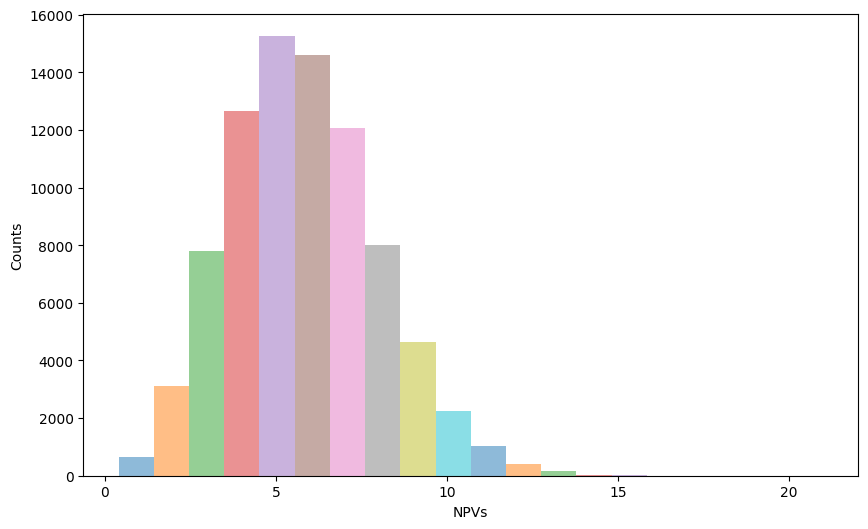

In [180]:
cutting_NPV_t_prompt = quantiles_cutting_data ('NPVs', 'Bs_DTF_PV_TAU (ps)', cut_df_c, quantiles_NPV_prompt,[0.5,17.5],[-10,10],nbin=20)

In [182]:
sig_eff_arr_NPV_prompt = array_sig_eff(cutting_NPV_t_prompt['cut_data'],d_m_B_ps)

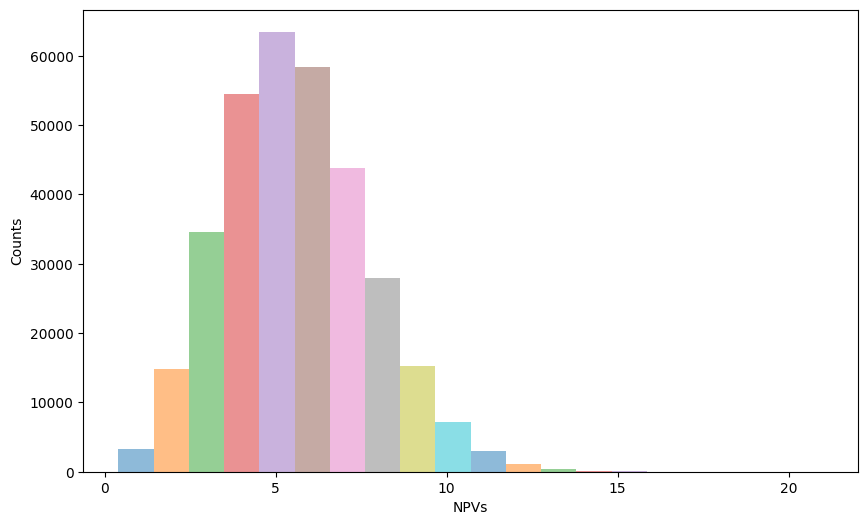

In [184]:
cutting_NPV_t_mcdata = quantiles_cutting_data ('NPVs', 'T_Diff (ps)', combined_df_mcdata, quantiles_NPV_prompt,[0.5,17.5],[-10,10],nbin=20)

In [185]:
sig_eff_arr_NPV_mcdata = array_sig_eff(cutting_NPV_t_mcdata['cut_data'],d_m_B_ps)

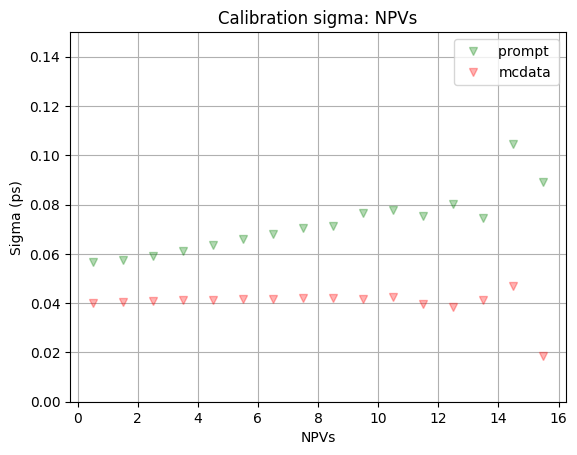

In [186]:
extended_x = np.linspace( 0, 0.06, 100) 
# extended_x = np.linspace(0, 0.01, 100)
fit_line_prompt = np.polyval(cali_sigma_prompt, extended_x)
fit_line_mcdata = np.polyval(cali_sigma_mcdata, extended_x)

plt.errorbar(cutting_NPV_t_prompt['mid_bin_point'],sig_eff_arr_NPV_prompt['sigma_eff'],alpha=0.3, fmt='v', color='green',label='prompt ')
plt.errorbar(cutting_NPV_t_mcdata['mid_bin_point'],sig_eff_arr_NPV_mcdata['sigma_eff'],alpha=0.3, fmt='v', color='red',label='mcdata')


# Customize the plot
plt.title("Calibration sigma: NPVs")
plt.xlabel("NPVs")
plt.ylabel("Sigma (ps)")
#plt.xlim(0, 0.011)
plt.ylim(0,0.15)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


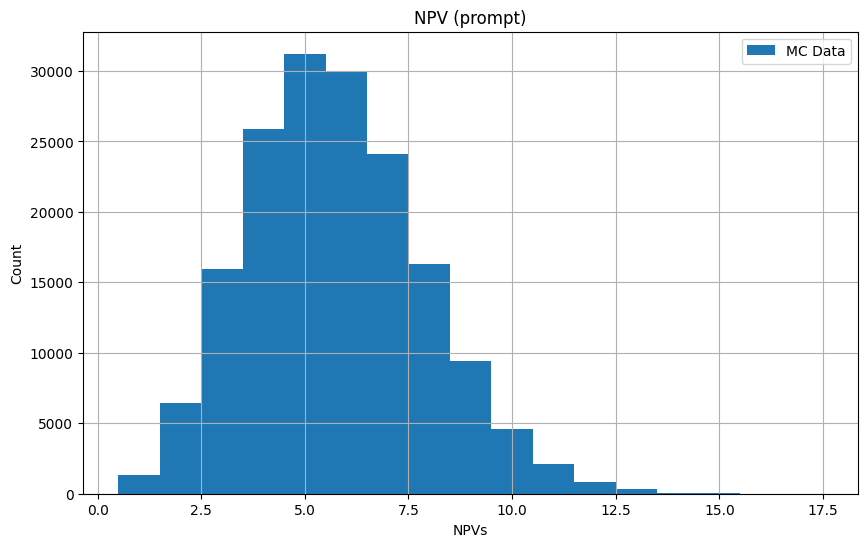

In [187]:
plt.figure(figsize=(10, 6))
plt.hist(combined_df_prompt['NPVs']  , range=(0.5,17.5), bins=17, alpha=1, label='MC Data')
plt.title("NPV (prompt)")
plt.xlabel("NPVs")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()

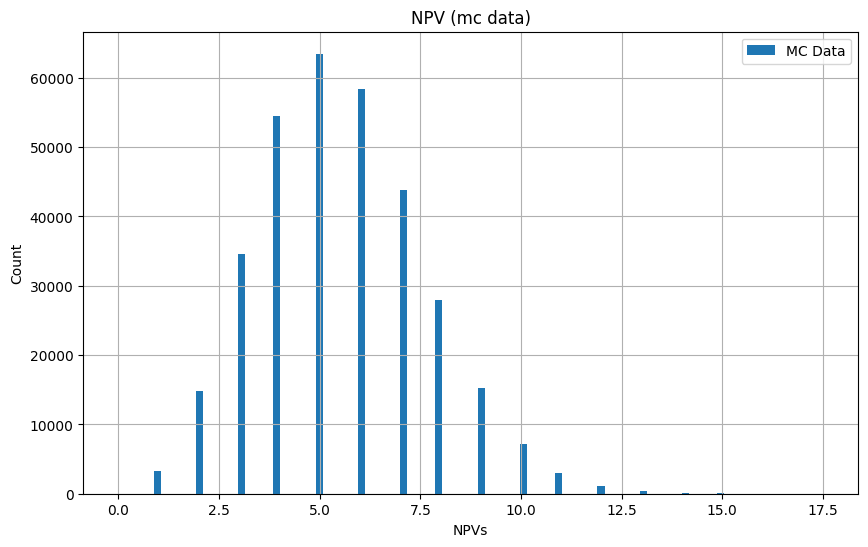

In [188]:
plt.figure(figsize=(10, 6))
plt.hist(combined_df_mcdata['NPVs']   , range=(0,17.5), bins=100, alpha=1, label='MC Data')
plt.title("NPV (mc data)")
plt.xlabel("NPVs")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()

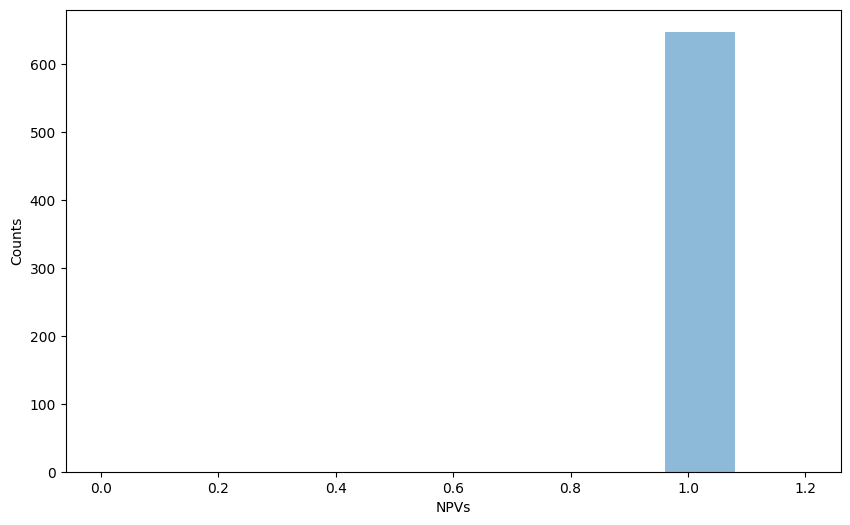

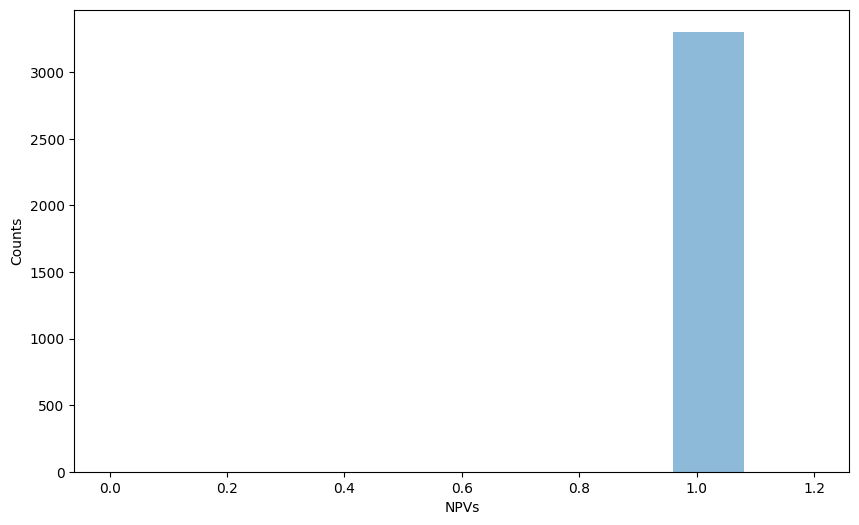

In [196]:
cutting_1PV_prompt = quantiles_cutting_data ('NPVs', 'Bs_DTF_PV_TAU (ps)', cut_df_c, [0,1],[0,1],[-10,10],nbin=10)
cutting_1PV_mcdata = quantiles_cutting_data ('NPVs', 'T_Diff (ps)', combined_df_mcdata, [0,1],[0,1],[-10,10],nbin=10)

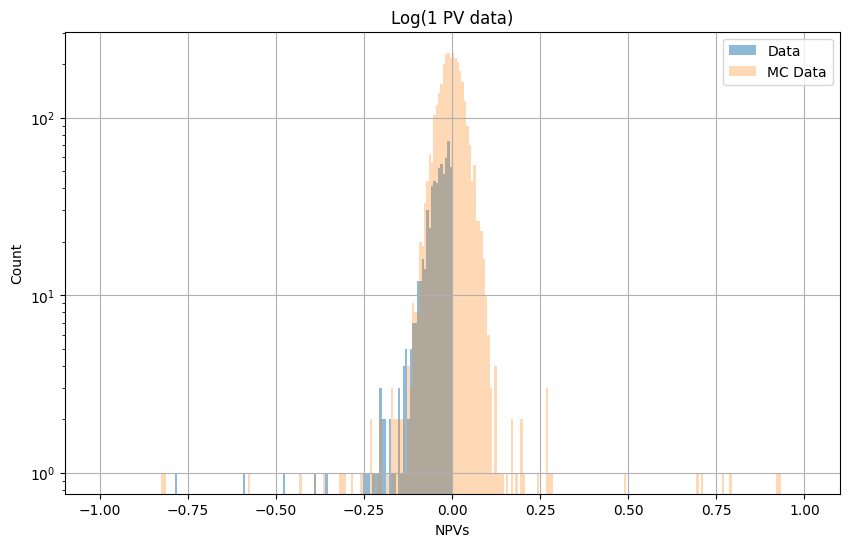

In [198]:

plt.figure(figsize=(10, 6))
plt.hist(cutting_1PV_prompt['cut_data'] , bins=300, alpha=0.5, range=(-1,1),label='Data')
plt.hist(cutting_1PV_mcdata['cut_data']  , bins=300,  range=(-1,1), alpha=0.3, label='MC Data')
plt.title("Log(1 PV data)")
plt.xlabel("NPVs")
plt.ylabel("Count")
plt.legend()
plt.yscale('log')
plt.grid(True)
plt.show()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_Bs_BPVLTIME


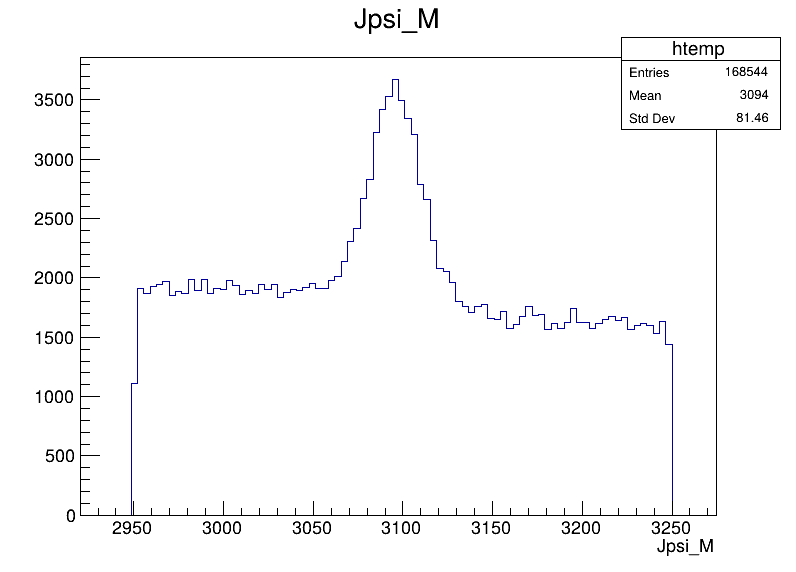

In [200]:
canvas_Bs_BPVLTIME = ROOT.TCanvas("canvas_Bs_BPVLTIME", "Bs Life TIME", 800, 600)
combined_prompt.Draw("Jpsi_M")
canvas_Bs_BPVLTIME.Draw()

Signal Mean: 3095.486033948093 ± 0.22180231172706044
Signal Sigma: 14.708351280048037 ± 0.23075285049289818
Number of Signal Events: 18785.18388113375 ± 274.8025648797193
[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Fitting -- RooAbsPdf::fitTo(model) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_model_data) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
Minuit2Minimizer: Minimize with max-calls 2500 convergence for edm < 1 strategy 1
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -903202.929767606664
Edm   = 0.000122555503462780195
Nfcn  = 730
mean	  = 3095.49	 +/-  0.221783	(limited)
nbkg	  = 149754	 +/-  455.537	(limited)
nsig	  = 18785.2	 +/-  275.952	(limited)
sigma	  = 14.7084	 +/-  0.231567	(limited)
tau	  = -0.0007

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =       681279.5121 Edm =       646644.3213 NCalls =     23
Info in <Minuit2>: NegativeG2LineSearch Doing a NegativeG2LineSearch since one of the G2 component is negative
Info in <Minuit2>: MnSeedGenerator Negative G2 found - new state: 
  Minimum value : 681279.5121
  Edm           : 646644.3213
  Internal parameters:	[    -0.2013579208    -0.4605539917     -0.927295218  -0.002506268288     0.6435011088]	
  Internal gradient  :	[     -90402.78571      80620.33461     -490672.8295     -2629539.975                0]	
  Internal covariance matrix:
[[  2.0145803e-06              0              0              0              0]
 [              0  5.0000695e-05              0              0              0]
 [              0              0  2.3179952e-06              0              0]
 [              0              0              0  2.4398742e-07          

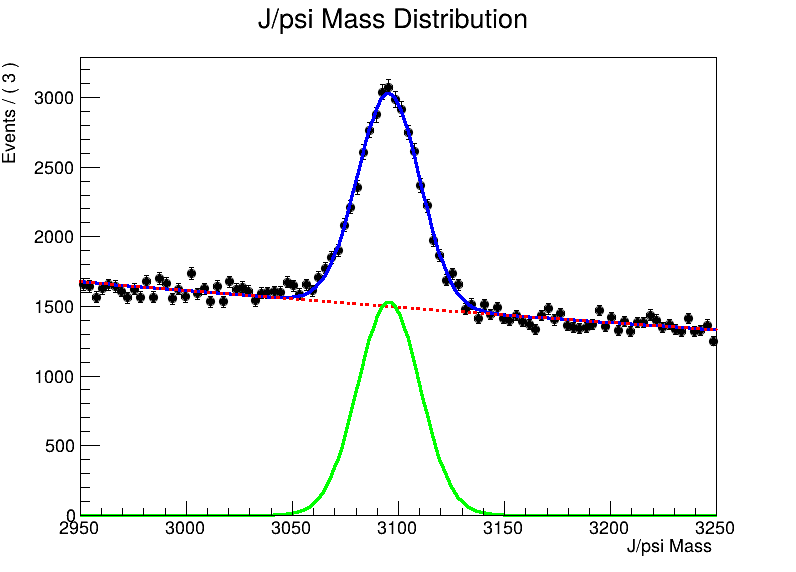

In [209]:
from ROOT import RooFit, RooRealVar, RooDataSet, RooGaussian, RooChebychev, RooVoigtian, RooAddPdf, RooArgList, RooArgSet

Jpsi_M = RooRealVar("Jpsi_M", "J/psi Mass", 2950, 3250) # x from 2950 to 3250

# 2. Load the data into a RooDataSet (make sure dtree is your TTree with the data)
data = RooDataSet("data", "dataset with J/psi mass", combined_prompt, RooArgSet(Jpsi_M))

# 3. Define the signal model (Gaussian)
mean = RooRealVar("mean", "mean of Voigtian", 3090, 3050, 3150)
sigma = RooRealVar("sigma", "sigma of gaussian", 20, 0.1, 40)   # Gaussian sigma
gauss = RooGaussian("gauss", "Gaussian Signal", Jpsi_M, mean, sigma)


# 4. Define the background model (Exponential or Linear)
tau = RooRealVar("tau", "slope of background", -1.0, -5.0, 0)
expo = RooExponential("expo", "Exponential Background", Jpsi_M, tau)

# 5. Define the combined model (Signal + Background)
nsig = RooRealVar("nsig", "number of signal events", 5000, 0, 50000)
nbkg = RooRealVar("nbkg", "number of background events", 50000, 0, 180000)
model = RooAddPdf("model", "signal + background", RooArgList(gauss, expo), RooArgList(nsig, nbkg))

# define PDF of signal and background 
model = RooAddPdf("model", "signal + background", RooArgList(gauss, expo), RooArgList(nsig, nbkg))

# fitting
model.fitTo(data)

canvas = ROOT.TCanvas("canvas", "J/psi Mass Fit", 800, 600)
frame = Jpsi_M.frame(RooFit.Title("J/psi Mass Distribution"))

# Plotting the data and its fitting line
data.plotOn(frame)
model.plotOn(frame)  # fitting line

# Plotting background line (red dash line)
model.plotOn(frame, RooFit.Components("expo"), RooFit.LineStyle(ROOT.kDashed), RooFit.LineColor(ROOT.kRed))

# Plotting signal line (green line)
model.plotOn(frame, RooFit.Components("gauss"), RooFit.LineStyle(ROOT.kSolid), RooFit.LineColor(ROOT.kGreen))

# Fitting parameters.
#param_box = model.paramOn(frame, RooFit.Layout(0.7, 0.9, 0.9))
#param_box.getAttText().SetTextSize(0.02)  

frame.Draw()
canvas.Draw()

# 11. Print the fit parameters (Signal mean, sigma, and event counts)
print(f"Signal Mean: {mean.getVal()} ± {mean.getError()}")
print(f"Signal Sigma: {sigma.getVal()} ± {sigma.getError()}")
print(f"Number of Signal Events: {nsig.getVal()} ± {nsig.getError()}")


[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #0 because Jpsi_M cannot accommodate the value 3238.24
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #8 because Jpsi_M cannot accommodate the value 3234.65
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #10 because Jpsi_M cannot accommodate the value 3236.88
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #13 because Jpsi_M cannot accommodate the value 3218.16
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping ...
[#0] WARNING:DataHandling -- RooTreeDataStore::loadValues(data) Ignored 49665 out-of-range events
[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Fitting -- RooAbsPdf::fitTo(model) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_model_data) Sum

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =      -64286.06237 Edm =       300563.3594 NCalls =     21
Info in <Minuit2>: NegativeG2LineSearch Doing a NegativeG2LineSearch since one of the G2 component is negative
Info in <Minuit2>: MnSeedGenerator Negative G2 found - new state: 
  Minimum value : -64286.06237
  Edm           : 300563.3594
  Internal parameters:	[    -0.2013579208    -0.4605539917     -0.848062079    -0.3421988554      0.927295218]	
  Internal gradient  :	[     -96827.18287      80622.36584     -301297.9873     -1039499.116                0]	
  Internal covariance matrix:
[[  2.8841122e-06              0              0              0              0]
 [              0  5.0000066e-05              0              0              0]
 [              0              0  4.0772968e-06              0              0]
 [              0              0              0  4.4428488e-07         

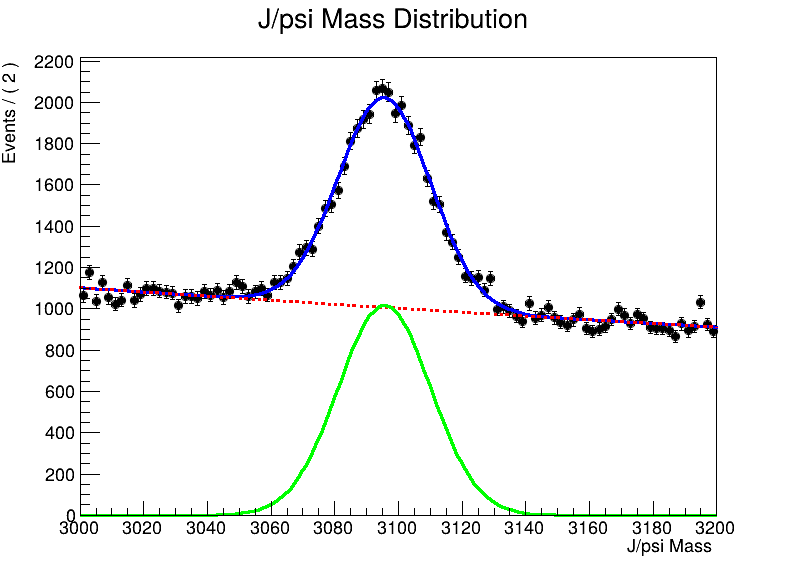

In [223]:
from ROOT import RooFit, RooRealVar, RooDataSet, RooGaussian, RooExponential, RooAddPdf, RooArgList, RooArgSet, RooStats

#  Load the data into a RooDataSet 
Jpsi_M = RooRealVar("Jpsi_M", "J/psi Mass", 3000, 3200)

data = RooDataSet("data", "dataset with J/psi mass", combined_prompt, RooArgSet(Jpsi_M))

# Define the signal model
mean = RooRealVar("mean", "mean of Gaussian", 3090, 3050, 3150)
sigma = RooRealVar("sigma", "sigma of Gaussian", 20, 0.1, 60)
gauss = RooGaussian("gauss", "Gaussian Signal", Jpsi_M, mean, sigma)

# Define exp
tau = RooRealVar("tau", "slope of background", -1.0, -10.0, 0)
expo = RooExponential("expo", "Exponential Background", Jpsi_M, tau)

# background and signal count
nsig = RooRealVar("nsig", "number of signal events", 5000, 0, 40000)
nbkg = RooRealVar("nbkg", "number of background events", 50000, 0, 180000)

# combined model 
model = RooAddPdf("model", "signal + background", RooArgList(gauss, expo), RooArgList(nsig, nbkg))

# fitting
model.fitTo(data)

canvas = ROOT.TCanvas("canvas", "J/psi Mass Fit", 800, 600)
frame = Jpsi_M.frame(RooFit.Title("J/psi Mass Distribution"))

# fitting and plotting
data.plotOn(frame)
model.plotOn(frame)  
model.plotOn(frame, RooFit.Components("expo"), RooFit.LineStyle(ROOT.kDashed), RooFit.LineColor(ROOT.kRed))  # 背景部分
model.plotOn(frame, RooFit.Components("gauss"), RooFit.LineStyle(ROOT.kSolid), RooFit.LineColor(ROOT.kGreen))  # 信号部分

frame.Draw()
canvas.Draw()

# Calculation of sWeight
sData = RooStats.SPlot("sData", "sPlot", data, model, RooArgList(nsig, nbkg))

In [224]:
print(f"Signal Mean: {mean.getVal()} ± {mean.getError()}")
print(f"Signal Sigma: {sigma.getVal()} ± {sigma.getError()}")
print(f"Number of Signal Events: {nsig.getVal()} ± {nsig.getError()}")
print(f"Number of Background Events: {nbkg.getVal()} ± {nbkg.getError()}")

# print sWeight
print("The sWeights")
data.Print("v")  

Signal Mean: 3095.6196673815316 ± 0.2237841967305485
Signal Sigma: 14.534271779011952 ± 0.23772581316798025
Number of Signal Events: 18500.28693643125 ± 239.68614993006796
Number of Background Events: 100378.55943083327 ± 373.2496129738015
The sWeights
DataStore data (dataset with J/psi mass)
  Contains 118879 entries
  Observables: 
    1)   Jpsi_M = 3098.51  L(3000 - 3200)  "J/psi Mass"
    2)  nsig_sw = 1.35183 C  L(-INF - +INF)  "nsig_sw"
    3)   L_nsig = 0.0269104 C  L(-INF - +INF)  "L_nsig"
    4)  nbkg_sw = -0.351821 C  L(-INF - +INF)  "nbkg_sw"
    5)   L_nbkg = 0.00499956 C  L(-INF - +INF)  "L_nbkg"
